# suggested plots

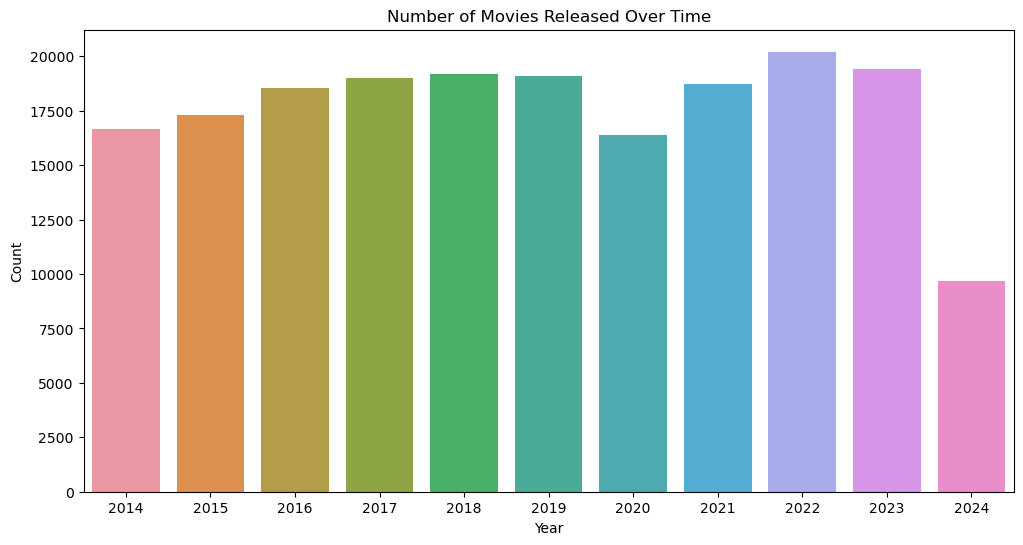

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='start_year', data=movies_df)
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


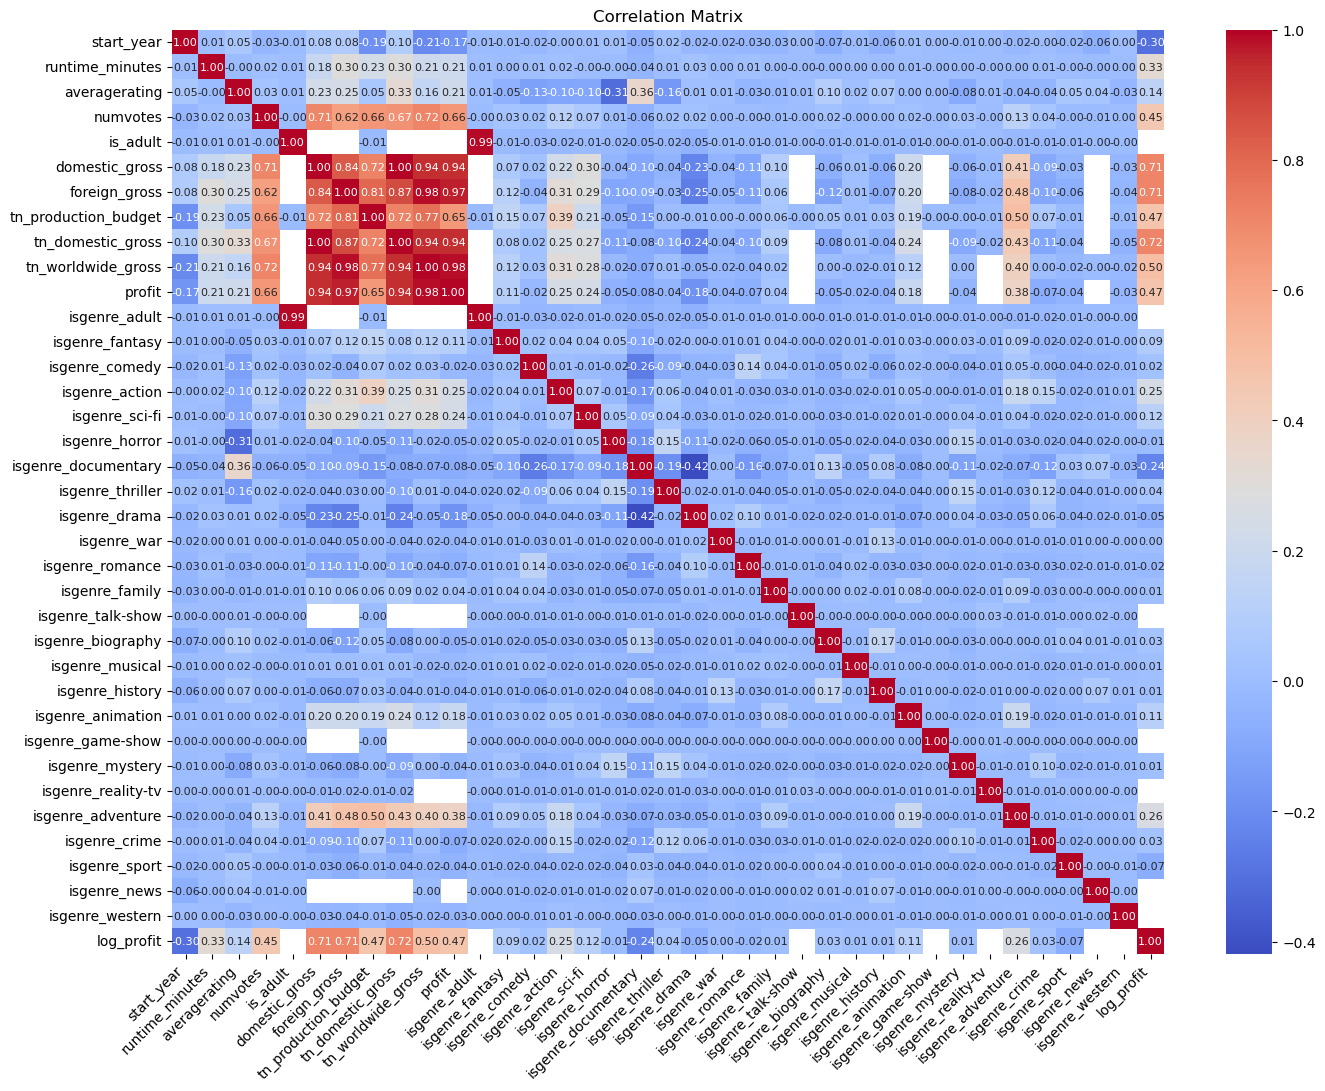

In [ ]:
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(movies_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})  # Adjust annotation font size
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are not rotated
plt.show()


In [ ]:
display(movies_df.describe())


,start_year,runtime_minutes,averagerating,numvotes,is_adult,domestic_gross,foreign_gross,tn_production_budget,tn_domestic_gross,tn_worldwide_gross,profit
count,194180.00,145355.00,101899.00,101899.00,194180.00,1379.00,1040.00,846.00,846.00,846.00,769.00
mean,2018.87,91.18,6.29,3150.34,0.01,39296589.68,84606632.00,44580512.00,59210504.00,150622320.00,117530688.00
std,3.03,212.47,1.55,29210.05,0.08,78542651.96,155444624.00,55497420.00,92438232.00,255263584.00,220850112.00
min,2014.00,1.00,1.00,5.00,0.00,0.00,0.00,7000.00,0.00,0.00,-106900000.00
25%,2016.00,73.00,5.30,18.00,0.00,231500.00,1877044.00,7625000.00,3366269.00,7241309.00,303792.00
50%,2019.00,90.00,6.40,65.00,0.00,5900000.00,18500000.00,21500000.00,27952988.00,50404824.00,33351496.00
75%,2022.00,103.00,7.40,355.00,0.00,44200000.00,83600000.00,58000000.00,67268832.00,161921728.00,124806432.00
max,2024.00,59460.00,10.00,2118433.00,1.00,700100000.00,1152000000.00,300000000.00,700059584.00,2048134144.00,1748134144.00


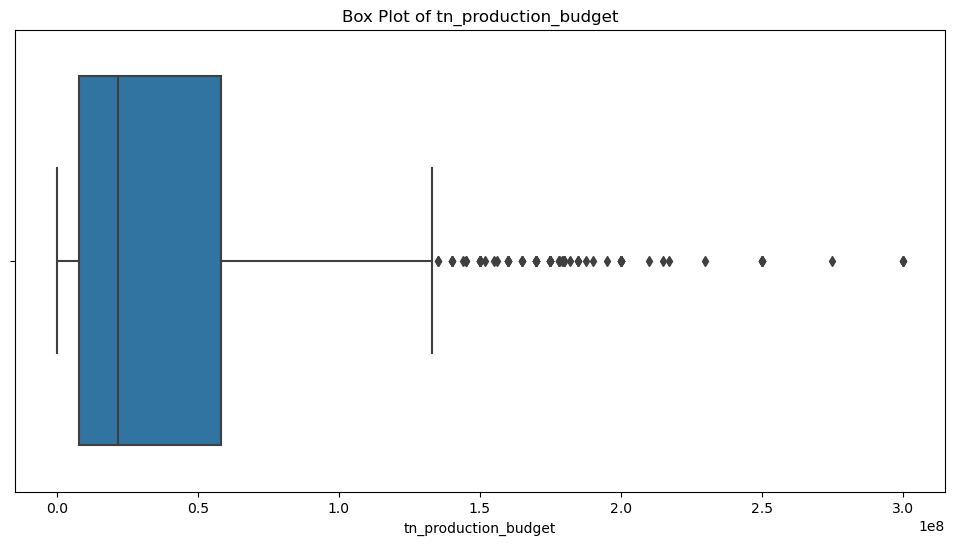

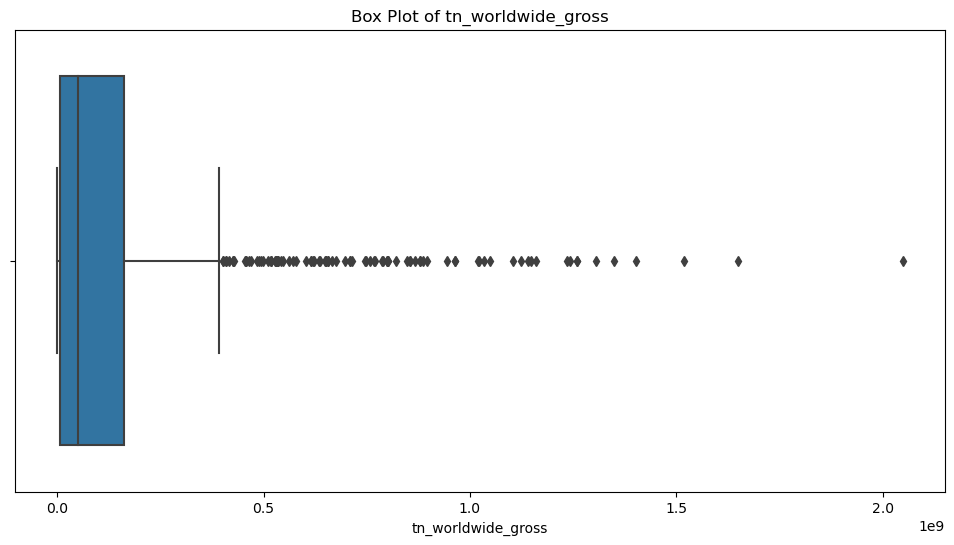

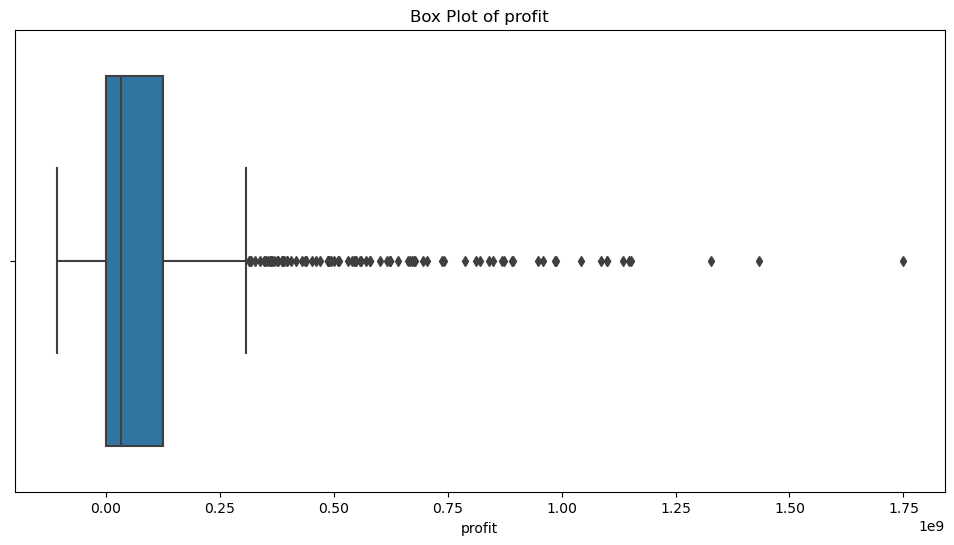

In [ ]:
# Function to plot box plots
def plot_box_plots(df, columns):
    for column in columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

# Columns to plot
columns_to_plot = ['tn_production_budget', 'tn_worldwide_gross', 'profit']
plot_box_plots(movies_df, columns_to_plot)


In [ ]:

# Calculate total vote counts, weighted average ratings, total profits, and average profit for each genre
genre_metrics = {
    'Genre': [],
    'TotalVotes': [],
    'WeightedAverageRating': [],
    'TotalProfits': [],
    'AverageProfit': []
}

# List of genre columns
genre_columns = [col for col in movies_df.columns if col.startswith('isgenre_')]

for genre_col in genre_columns:
    genre_name = genre_col.replace('isgenre_', '')

    # Filter rows where this genre is True
    genre_df = movies_df[movies_df[genre_col]]

    # Calculate total votes
    total_votes = genre_df['numvotes'].sum()
    
    # Calculate weighted average rating
    if total_votes > 0:
        weighted_avg_rating = (genre_df['averagerating'] * genre_df['numvotes']).sum() / total_votes
    else:
        weighted_avg_rating = 0
    
    # Calculate total profits
    total_profits = genre_df['profit'].sum()
    
    # Calculate average profit
    num_movies = len(genre_df)
    if num_movies > 0:
        average_profit = total_profits / num_movies
    else:
        average_profit = 0

    # Append to metrics
    genre_metrics['Genre'].append(genre_name)
    genre_metrics['TotalVotes'].append(total_votes)
    genre_metrics['WeightedAverageRating'].append(weighted_avg_rating)
    genre_metrics['TotalProfits'].append(total_profits)
    genre_metrics['AverageProfit'].append(average_profit)

# Convert to DataFrame
genre_metrics_df = pd.DataFrame(genre_metrics)

# Scale the values for better readability
genre_metrics_df['TotalVotes'] = genre_metrics_df['TotalVotes'] / 1000  # to thousands
genre_metrics_df['TotalProfits'] = genre_metrics_df['TotalProfits'] / 1e6  # to millions
genre_metrics_df['AverageProfit'] = genre_metrics_df['AverageProfit'] / 1e3  # to millions


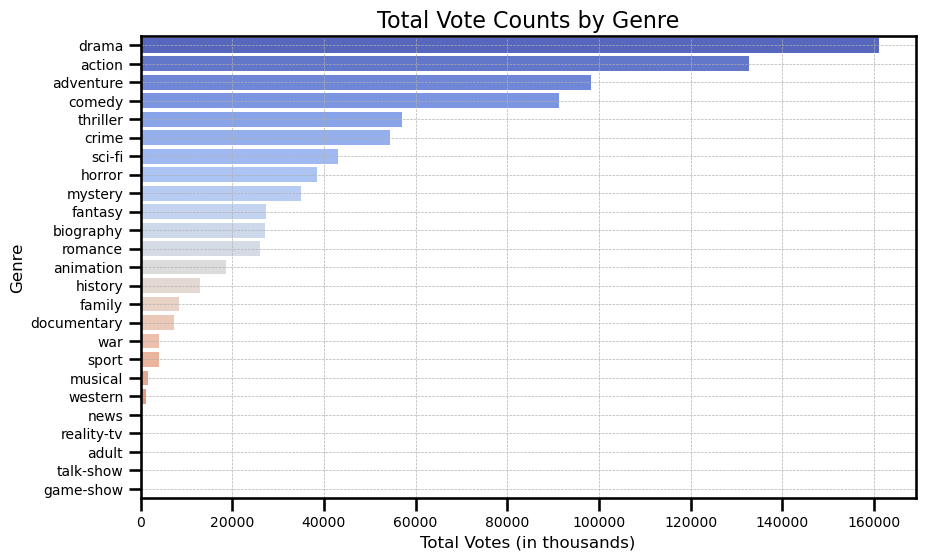

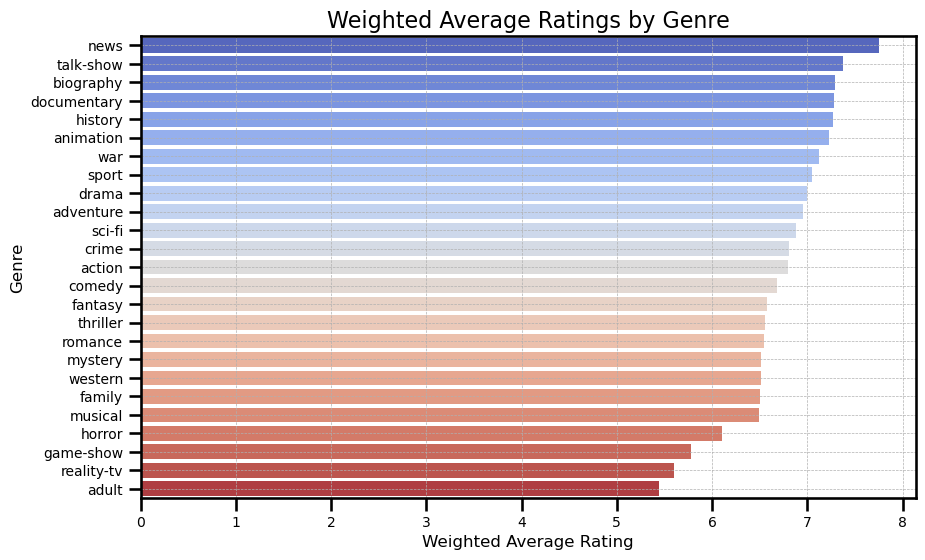

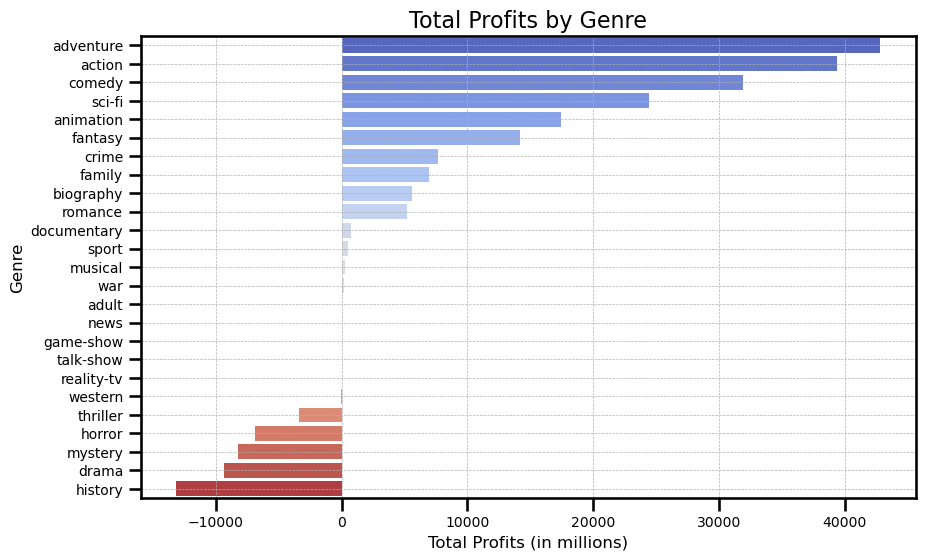

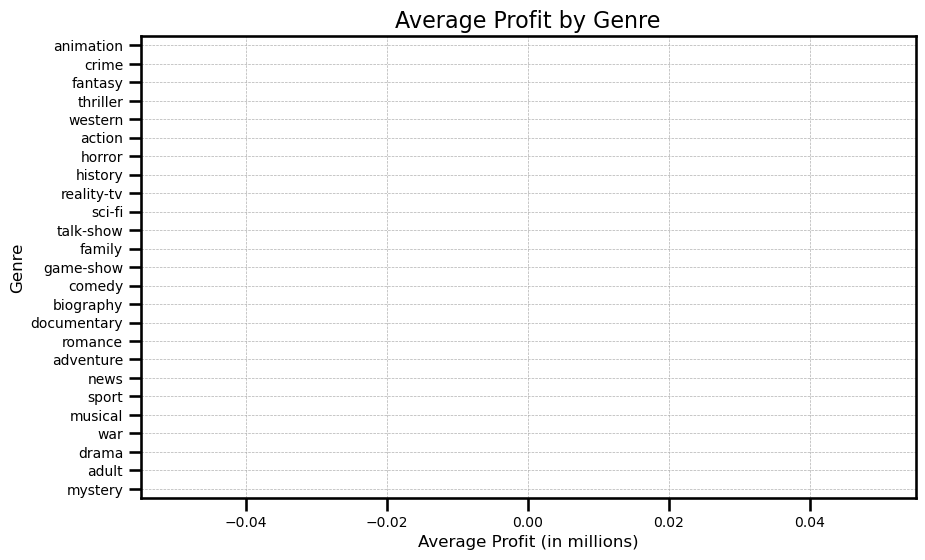

In [ ]:
# Create a color palette that spans from hot to cool
num_genres = len(genre_metrics_df)
hot_to_cool_palette = sns.color_palette("coolwarm", num_genres)

# Calculate Average Profit per Genre
genre_metrics_df['AverageProfit'] = genre_metrics_df['TotalProfits'] / movies_df[genre_columns].sum()

# Plot total vote counts by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalVotes', y='Genre', data=genre_metrics_df.sort_values(by='TotalVotes', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Vote Counts by Genre', fontsize=16)
plt.xlabel('Total Votes (in thousands)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot weighted average ratings by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='WeightedAverageRating', y='Genre', data=genre_metrics_df.sort_values(by='WeightedAverageRating', ascending=False), palette=hot_to_cool_palette)
plt.title('Weighted Average Ratings by Genre', fontsize=16)
plt.xlabel('Weighted Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot total profits by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalProfits', y='Genre', data=genre_metrics_df.sort_values(by='TotalProfits', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Profits by Genre', fontsize=16)
plt.xlabel('Total Profits (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot average profit per genre
plt.figure(figsize=(10, 6))
sns.barplot(x='AverageProfit', y='Genre', data=genre_metrics_df.sort_values(by='AverageProfit', ascending=False), palette=hot_to_cool_palette)
plt.title('Average Profit by Genre', fontsize=16)
plt.xlabel('Average Profit (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


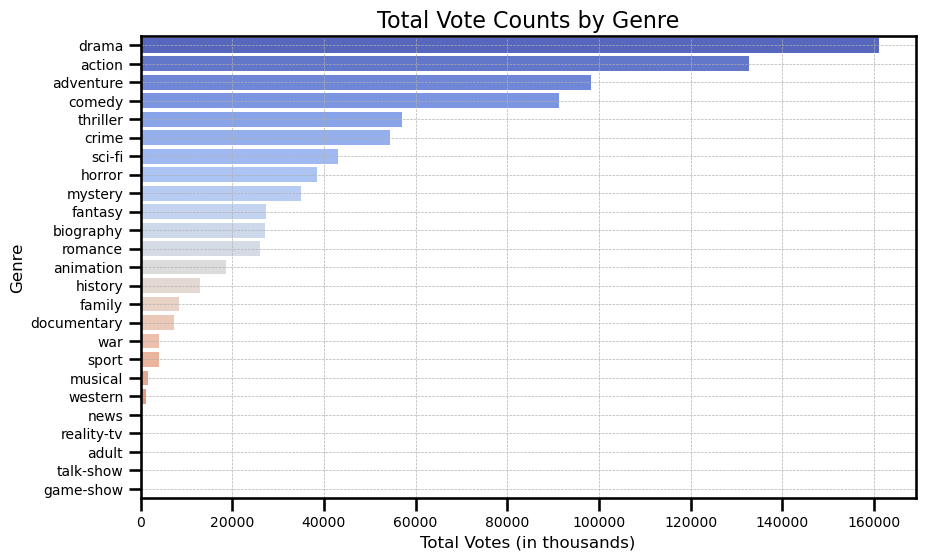

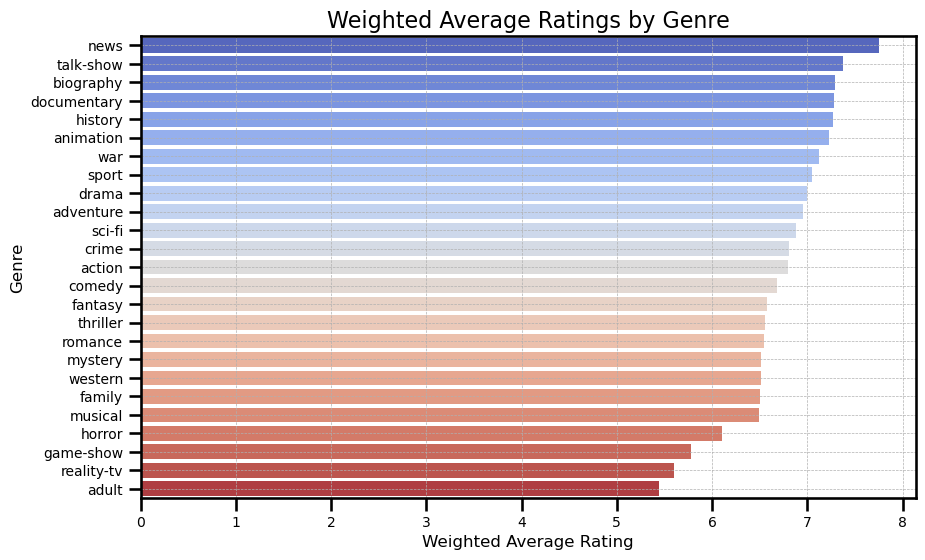

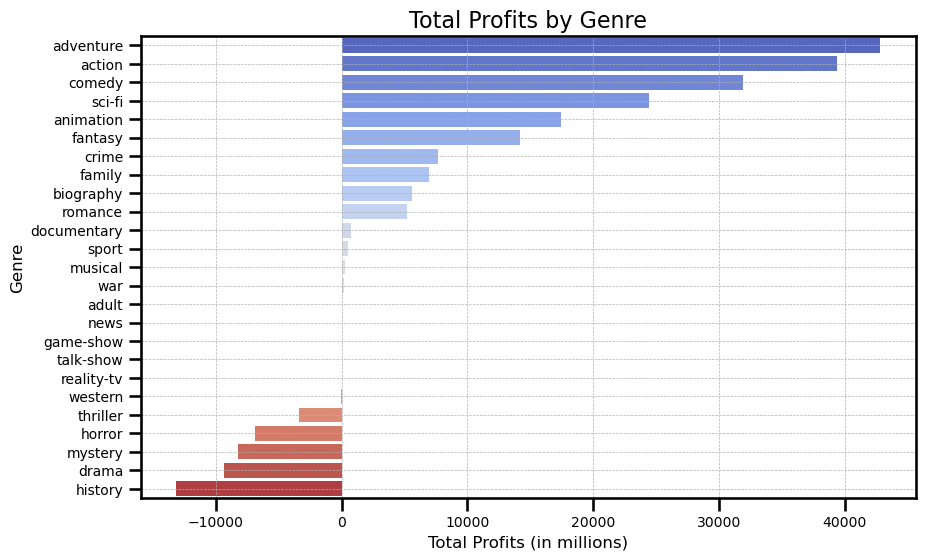

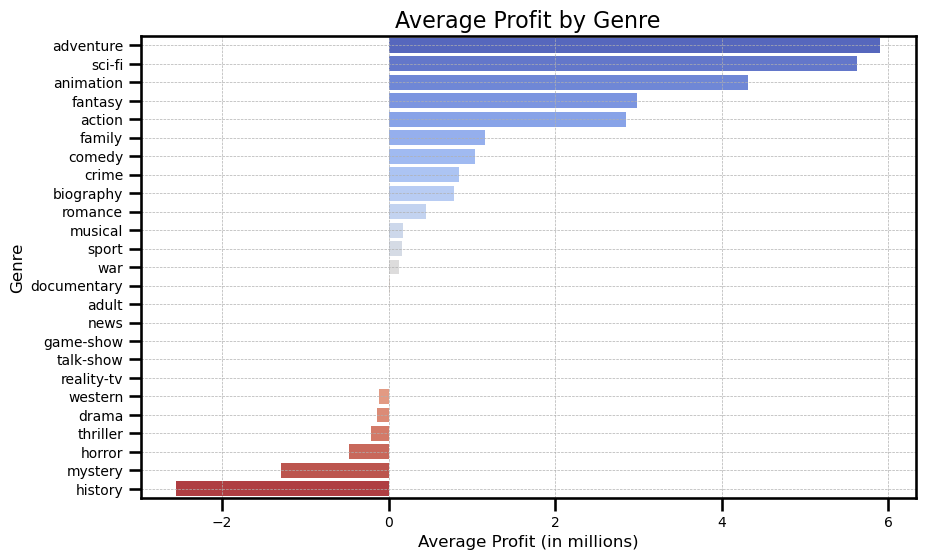

In [ ]:

# Calculate total vote counts, weighted average ratings, total profits, and average profit for each genre
genre_metrics = {
    'Genre': [],
    'TotalVotes': [],
    'WeightedAverageRating': [],
    'TotalProfits': [],
    'AverageProfit': []
}

# List of genre columns
genre_columns = [col for col in movies_df.columns if col.startswith('isgenre_')]

for genre_col in genre_columns:
    genre_name = genre_col.replace('isgenre_', '')

    # Filter rows where this genre is True
    genre_df = movies_df[movies_df[genre_col]]

    # Calculate total votes
    total_votes = genre_df['numvotes'].sum()
    
    # Calculate weighted average rating
    if total_votes > 0:
        weighted_avg_rating = (genre_df['averagerating'] * genre_df['numvotes']).sum() / total_votes
    else:
        weighted_avg_rating = 0
    
    # Calculate total profits
    total_profits = genre_df['profit'].sum()
    
    # Calculate average profit
    num_movies = len(genre_df)
    if num_movies > 0:
        average_profit = total_profits / num_movies
    else:
        average_profit = 0

    # Append to metrics
    genre_metrics['Genre'].append(genre_name)
    genre_metrics['TotalVotes'].append(total_votes)
    genre_metrics['WeightedAverageRating'].append(weighted_avg_rating)
    genre_metrics['TotalProfits'].append(total_profits)
    genre_metrics['AverageProfit'].append(average_profit)

# Convert to DataFrame
genre_metrics_df = pd.DataFrame(genre_metrics)

# Scale the values for better readability
genre_metrics_df['TotalVotes'] = genre_metrics_df['TotalVotes'] / 1000  # to thousands
genre_metrics_df['TotalProfits'] = genre_metrics_df['TotalProfits'] / 1e6  # to millions
genre_metrics_df['AverageProfit'] = genre_metrics_df['AverageProfit'] / 1e6  # to millions

# Create a color palette that spans from hot to cool
num_genres = len(genre_metrics_df)
hot_to_cool_palette = sns.color_palette("coolwarm", num_genres)

# Plot total vote counts by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalVotes', y='Genre', data=genre_metrics_df.sort_values(by='TotalVotes', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Vote Counts by Genre', fontsize=16)
plt.xlabel('Total Votes (in thousands)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot weighted average ratings by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='WeightedAverageRating', y='Genre', data=genre_metrics_df.sort_values(by='WeightedAverageRating', ascending=False), palette=hot_to_cool_palette)
plt.title('Weighted Average Ratings by Genre', fontsize=16)
plt.xlabel('Weighted Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot total profits by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalProfits', y='Genre', data=genre_metrics_df.sort_values(by='TotalProfits', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Profits by Genre', fontsize=16)
plt.xlabel('Total Profits (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot average profit by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='AverageProfit', y='Genre', data=genre_metrics_df.sort_values(by='AverageProfit', ascending=False), palette=hot_to_cool_palette)
plt.title('Average Profit by Genre', fontsize=16)
plt.xlabel('Average Profit (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
import pandas as pd
import sqlite3
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Assume directors_df already contains director information
# Merge the director information with the movies_df DataFrame
movies_df_with_directors = pd.merge(movies_df, directors, on='movie_id', how='left')

# Create a copy of the DataFrame for the Chi-Square test
movies_df_copy = movies_df_with_directors.copy()

# Fill missing values in 'profit' with the mean of the column in the copied DataFrame
movies_df_copy['profit'] = movies_df_copy['profit'].fillna(movies_df_copy['profit'].mean())

# Verify that there are no missing values in the 'profit' column of the copy
missing_profits_copy = movies_df_copy['profit'].isnull().sum()
print(f"Number of missing values in 'profit' after filling in the copy: {missing_profits_copy}")

# Discretize profit into 3 categories: low, medium, high in the copied DataFrame
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
movies_df_copy['profit_category'] = discretizer.fit_transform(movies_df_copy[['profit']]).astype(int)

# Display the first few rows to check the profit categories in the copy
display(movies_df_copy[['movie_id', 'profit', 'profit_category']].head())

# Create contingency tables for actor1, actor2, and actor3 against profit categories in the copied DataFrame
contingency_actor1 = pd.crosstab(movies_df_copy['actor1'], movies_df_copy['profit_category'])
contingency_actor2 = pd.crosstab(movies_df_copy['actor2'], movies_df_copy['profit_category'])
contingency_actor3 = pd.crosstab(movies_df_copy['actor3'], movies_df_copy['profit_category'])

# Display the contingency tables
print("Contingency Table for Actor 1:\n", contingency_actor1.head())
print("Contingency Table for Actor 2:\n", contingency_actor2.head())
print("Contingency Table for Actor 3:\n", contingency_actor3.head())

# Perform Chi-Square test for actor1
chi2_actor1, p_actor1, dof_actor1, ex_actor1 = chi2_contingency(contingency_actor1)
print(f"Chi-Square Test for Actor 1: chi2={chi2_actor1}, p-value={p_actor1}")

# Perform Chi-Square test for actor2
chi2_actor2, p_actor2, dof_actor2, ex_actor2 = chi2_contingency(contingency_actor2)
print(f"Chi-Square Test for Actor 2: chi2={chi2_actor2}, p-value={p_actor2}")

# Perform Chi-Square test for actor3
chi2_actor3, p_actor3, dof_actor3, ex_actor3 = chi2_contingency(contingency_actor3)
print(f"Chi-Square Test for Actor 3: chi2={chi2_actor3}, p-value={p_actor3}")

# Create contingency tables for directors and profit categories in the copied DataFrame
contingency_director = pd.crosstab(movies_df_copy['person_id'], movies_df_copy['profit_category'])

# Display the contingency table
print("Contingency Table for Directors:\n", contingency_director.head())

# Perform Chi-Square test for directors
chi2_director, p_director, dof_director, ex_director = chi2_contingency(contingency_director)
print(f"Chi-Square Test for Directors: chi2={chi2_director}, p-value={p_director}")


Number of missing values in 'profit' after filling in the copy: 0


/home/atrix/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/atrix/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,movie_id,profit,profit_category
0,tt0011801,56370248.00,1
1,tt0013274,56370248.00,1
2,tt0062336,56370248.00,1
3,tt0069049,56370248.00,1
4,tt0070596,56370248.00,1


Contingency Table for Actor 1:
 profit_category               0  1
actor1                            
'Ganja' Karuppu               0  7
'Punnagai Poo' Geetha         0  1
1996 Olympic Water Polo Team  0  1
2Face Idibia                  0  1
A'Ali de Sousa                0  3
Contingency Table for Actor 2:
 profit_category               0  1
actor2                            
'Ganja' Karuppu               0  3
'Om' Rakesh Chaturvedi        0  1
'University' Jeevan           0  1
143 Anand                     0  1
2004 Olympic Water Polo Team  0  1
Contingency Table for Actor 3:
 profit_category          0  1
actor3                       
'Ganja' Karuppu          0  5
'Poo' Ram                0  1
'Punnagai Poo' Geetha    0  1
'Sushi' Xhyvette Holder  0  1
'Sushii' Xhyette Holder  0  1
Chi-Square Test for Actor 1: chi2=40165.621908722824, p-value=1.0
Chi-Square Test for Actor 2: chi2=42354.638795193714, p-value=1.0
Chi-Square Test for Actor 3: chi2=45667.920119432936, p-value=1.51969474

KeyError: 'person_id'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Convert boolean columns to numeric
movies_df = movies_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Filter numeric columns for PCA, including 'isgenre_' columns
numeric_cols = movies_df.select_dtypes(include=[np.number])

# Ensure columns to be excluded are in the dataframe
exclude_cols = ['movie_id', 'is_adult']
numeric_cols = numeric_cols.drop(columns=[col for col in exclude_cols if col in numeric_cols.columns])

# Handle missing values by filling with the mean of the column
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# Handle infinite values by replacing them with NaN and then filling them with the column mean
numeric_cols.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Get the loadings (components)
loadings = pca.components_.T

# Calculate the importance of each feature
importance = np.sum(np.abs(loadings), axis=1)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': numeric_cols.columns,
    'Importance': importance
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Separate genre features from other features
genre_features = feature_importance[feature_importance['Feature'].str.startswith('isgenre_')]
other_features = feature_importance[~feature_importance['Feature'].str.startswith('isgenre_')]

# Rename genre features for readability
genre_features['Feature'] = genre_features['Feature'].str.replace('isgenre_', '').str.replace('_', ' ').str.title()

# Display the most important features
print("Most Important Features (Overall):")
print(feature_importance)

print("\nMost Important Genre Features:")
print(genre_features)

print("\nMost Important Non-Genre Features:")
print(other_features)



Most Important Features (Overall):
                 Feature  Importance
26     isgenre_animation        4.14
28        isgenre_family        4.08
25        isgenre_comedy        4.08
27         isgenre_crime        4.03
24        isgenre_sci-fi        3.96
0             start_year        3.90
2          averagerating        3.89
31           isgenre_war        3.87
13        isgenre_action        3.83
29        isgenre_horror        3.79
23       isgenre_fantasy        3.77
21       isgenre_mystery        3.74
18       isgenre_romance        3.71
20      isgenre_thriller        3.55
22     isgenre_biography        3.46
33            log_profit        3.44
14     isgenre_adventure        3.35
15       isgenre_history        3.31
32         isgenre_sport        3.15
11         isgenre_drama        3.15
1        runtime_minutes        2.72
30   isgenre_documentary        2.67
10     profit_proportion        2.64
19       isgenre_western        2.59
3               numvotes        2.57
12 

/tmp/ipykernel_160957/134152745.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_features['Feature'] = genre_features['Feature'].str.replace('isgenre_', '').str.replace('_', ' ').str.title()


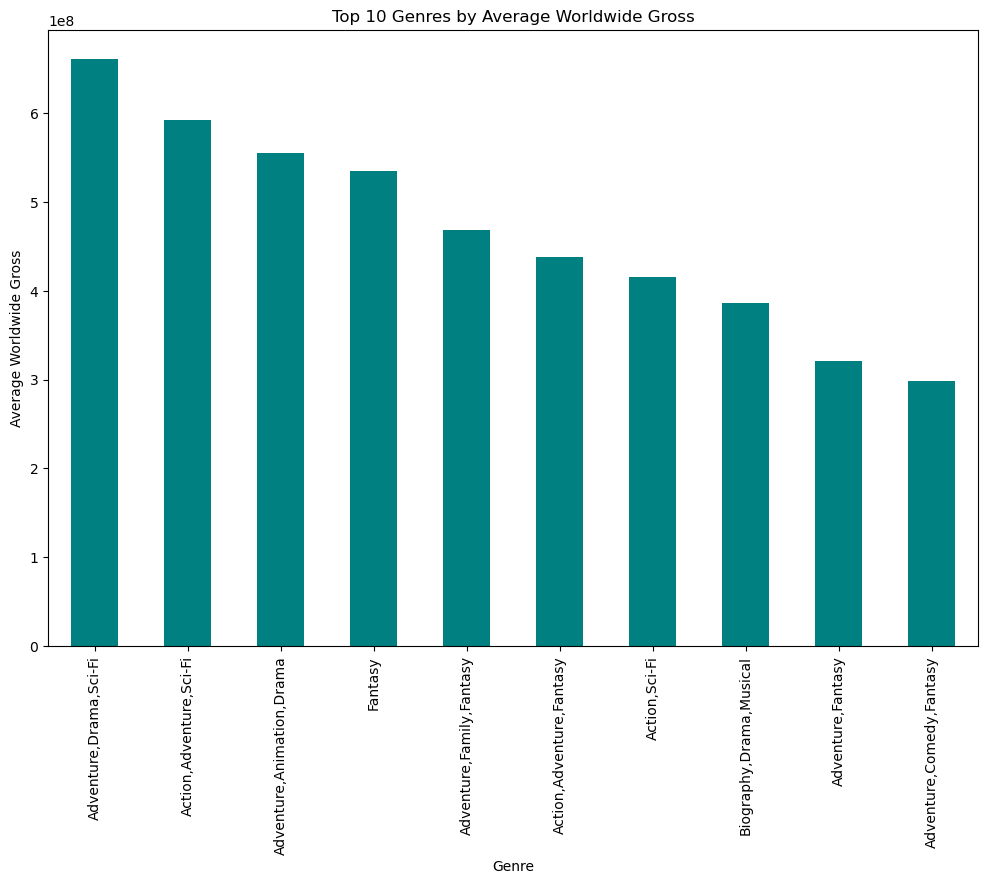

In [ ]:
# Getting a general idea of the higher grossing genres


genre_gross = movies_without_nan_profit.groupby('genres')['tn_worldwide_gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
genre_gross.plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Average Worldwide Gross')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.show()

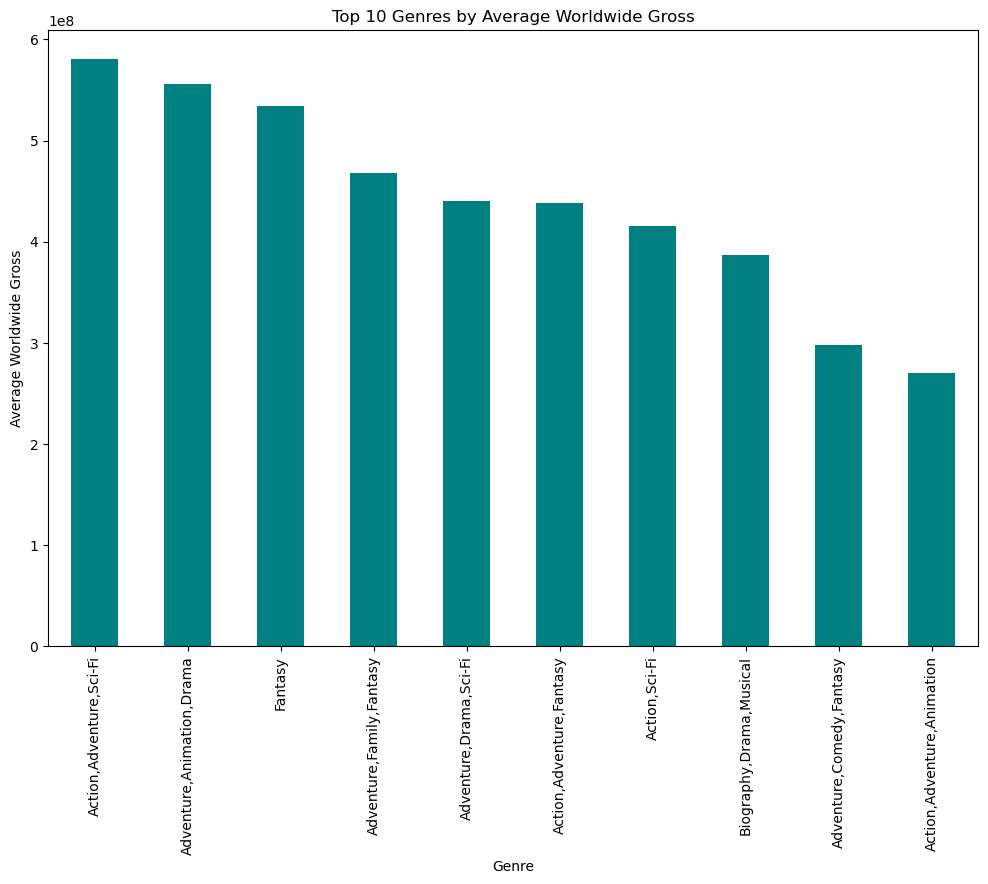

In [ ]:
# Getting a general idea of the higher grossing genres


genre_gross = movies_without_nan_profit.groupby('genres')['tn_worldwide_gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
genre_gross.plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Average Worldwide Gross')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.show()

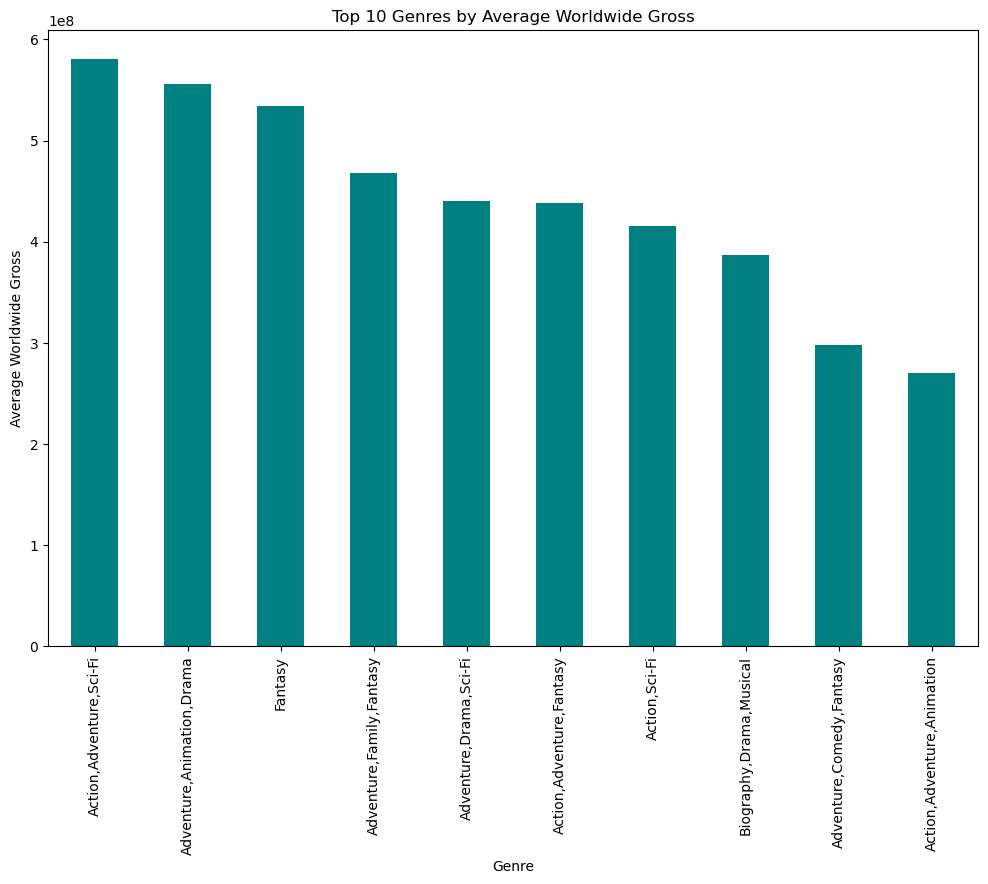

In [ ]:
# Getting a general idea of the higher grossing genres


genre_gross = movies_without_nan_profit.groupby('genres')['tn_worldwide_gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
genre_gross.plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Average Worldwide Gross')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.show()

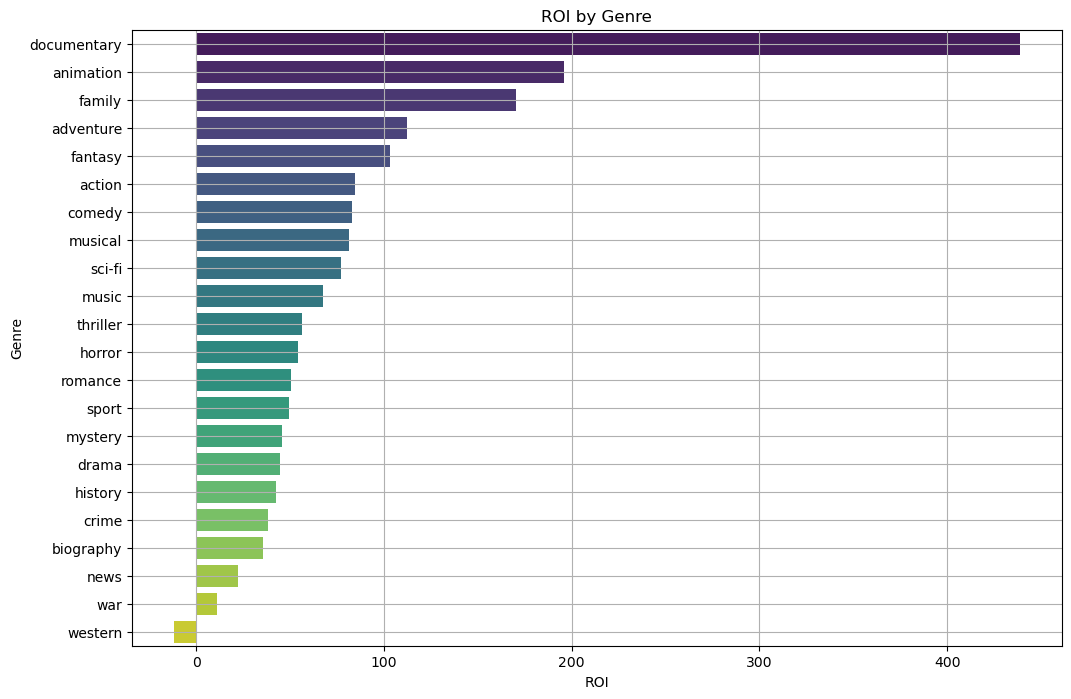

In [ ]:
genre_metrics_df['ROI'] = (genre_metrics_df['TotalProfits'] / genre_metrics_df['TotalVotes']) * 100

genre_metrics_df = genre_metrics_df.sort_values(by='ROI', ascending=False)

# Plotting ROI by Genre
plt.figure(figsize=(12, 8))
sns.barplot(x='ROI', y='Genre', data=genre_metrics_df, palette='viridis')
plt.title('ROI by Genre')
plt.xlabel('ROI')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

In [ ]:
movies_df['profit_proportion'] = np.where(
    (movies_df['tn_production_budget'] != 0) & (~movies_df['tn_production_budget'].isna()),
    movies_df['profit'] / movies_df['tn_production_budget'],
    np.nan
)

# Melting the DataFrame
hot_encoded_genres = [col for col in movies_df.columns if col.startswith('isgenre_')]

melted_df_prop = movies_df.melt(
    id_vars=['primary_title', 'profit_proportion'],
    value_vars=hot_encoded_genres,
    var_name='genre',
    value_name='is_genre'
)

# Filter out rows where the movie is not of the genre (i.e., is_genre == False)
melted_df_prop = melted_df_prop[melted_df_prop['is_genre'] == True]

# Clean up the genre names
melted_df_prop['genre'] = melted_df_prop['genre'].str.replace('isgenre_', '')

# Group by genre and calculate mean profit proportion
genre_profit_proportion = melted_df_prop.groupby('genre')['profit_proportion'].mean()

# Sort the genres by mean profit proportion
sorted_genre_profit_proportion = genre_profit_proportion.sort_values(ascending=False)

# Display the results
print("Proportionally Most Profitable Genres:")
print(sorted_genre_profit_proportion.head(10))
display(genre_metrics_df)

Proportionally Most Profitable Genres:
genre
horror        7.79
mystery       7.27
music         5.92
documentary   4.81
thriller      4.34
crime         3.62
drama         3.41
comedy        3.34
sci-fi        3.06
family        3.06
Name: profit_proportion, dtype: float32


,Genre,TotalVotes,WeightedAverageRating,TotalProfits,AverageProfit,AverageProportionalProfit,ROI
11,documentary,232.46,6.91,1019.58,9353.97,4.81,438.61
3,animation,14903.06,7.26,29157.18,133748.51,2.93,195.65
19,family,5515.48,6.67,9396.84,63492.17,3.06,170.37
14,adventure,87919.24,7.03,98702.30,155436.70,2.45,112.26
8,fantasy,21719.59,6.66,22418.09,109356.54,1.40,103.22
1,action,110406.88,6.95,93545.26,101901.15,2.87,84.73
5,comedy,63469.26,6.93,52535.30,49986.02,3.34,82.77
17,musical,834.99,6.82,677.45,20528.87,0.50,81.13
9,sci-fi,38107.91,7.06,29324.05,176650.93,3.06,76.95
15,music,6227.16,7.41,4208.38,38258.03,5.92,67.58


## FIXED OLD

Index(['Genre', 'TotalVotes', 'WeightedAverageRating', 'TotalProfits',
       'AverageProfit', 'AverageProportionalProfit'],
      dtype='object')

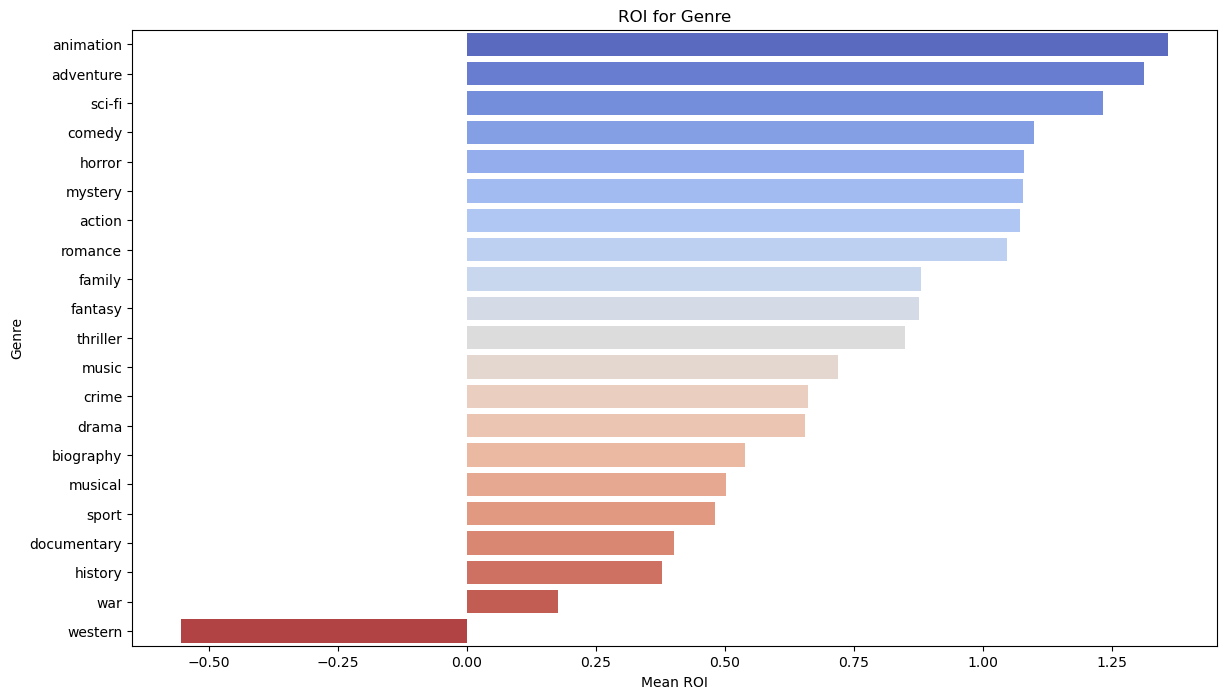

In [ ]:
display(genre_metrics_df.columns)
genre_metrics_df = genre_metrics_df.sort_values(by='AverageProportionalProfit',ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_metrics_df['AverageProportionalProfit'], y=genre_metrics_df['Genre'], palette='coolwarm')
plt.title('ROI for Genre')
plt.xlabel('Mean ROI')
plt.ylabel('Genre')
plt.show()

In [ ]:
iqr_movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_type,is_adult,directors,writers,actor1,actor2,actor3,studio,domestic_gross,foreign_gross,tn_production_budget,tn_domestic_gross,tn_worldwide_gross,profit,profit_proportion,roi_perc,isgenre_sci-fi,isgenre_sport,isgenre_action,isgenre_mystery,isgenre_biography,isgenre_history,isgenre_thriller,isgenre_drama,isgenre_crime,isgenre_musical,isgenre_adventure,isgenre_western,isgenre_romance,isgenre_fantasy,isgenre_music,isgenre_documentary,isgenre_comedy,isgenre_animation,isgenre_horror,isgenre_war,isgenre_family,scaled_profit,scaled_tn_production_budget,scaled_tn_worldwide_gross,scaled_domestic_gross,scaled_foreign_gross,log_profit
909,tt0293429,Mortal Kombat,Mortal Kombat,2021,110.00,"Action,Adventure,Fantasy",6.00,191172.00,movie,0,Simon McQuoid,Greg Russo,NaN,NaN,NaN,NaN,NaN,NaN,55000000.00,NaN,83601016.00,28601016.00,0.52,52.00,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,28.60,55.00,83.60,NaN,NaN,17.17
914,tt0315642,Wazir,Wazir,2016,103.00,"Action,Crime,Drama",7.10,19991.00,movie,0,Bejoy Nambiar,Vidhu Vinod Chopra/Abhijat Joshi/Shubhra Swarup/Bejoy Nambiar/Abhijeet Shirish Deshpande/Natasha Sahgal/Gazal Dhaliwal/Shubhra Marfatia,Amitabh Bachchan,Farhan Akhtar,Aditi Rao Hydari,Relbig.,1100000.00,NaN,5200000.00,NaN,5633588.00,433588.00,0.08,8.34,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,0.43,5.20,5.63,1.10,NaN,12.98
930,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,127615.00,movie,0,Scott Frank,Lawrence Block/Scott Frank,Liam Neeson,Dan Stevens,David Harbour,Uni.,26017684.00,36090904.00,28000000.00,26017684.00,62108588.00,34108588.00,1.22,121.82,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,34.11,28.00,62.11,26.02,36.09,17.35
932,tt0369610,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",6.90,682448.00,movie,0,Colin Trevorrow,Michael Crichton/Rick Jaffa/Amanda Silver/Colin Trevorrow/Derek Connolly,Chris Pratt,Bryce Dallas Howard,Ty Simpkins,Uni.,652270656.00,996584256.00,215000000.00,652270656.00,1648854912.00,1433854976.00,6.67,666.91,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1433.85,215.00,1648.85,652.27,996.58,21.08
934,tt0376479,American Pastoral,American Pastoral,2016,108.00,"Crime,Drama,Mystery",6.10,18140.00,movie,0,Ewan McGregor,John Romano/Philip Roth,Ewan McGregor,Jennifer Connelly,Dakota Fanning,LGF,544000.00,NaN,10000000.00,NaN,2063436.00,-7936564.00,-0.79,-79.37,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,-7.94,10.00,2.06,0.54,NaN,NaN


/tmp/ipykernel_501844/3545019077.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iqr_movies_df['genre'] = iqr_movies_df.apply(get_genre, axis=1)


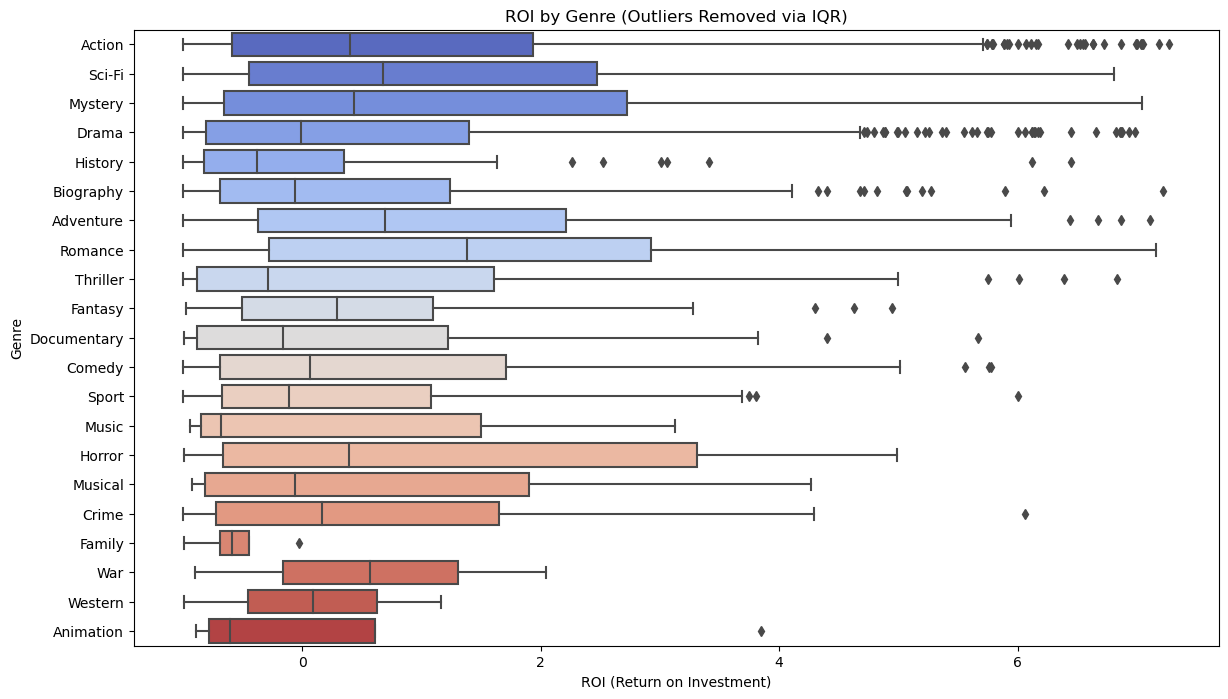

In [ ]:
# Sort the genre_metrics_df by AverageProportionalProfit
sorted_genres = genre_metrics_df.sort_values(by='AverageProportionalProfit', ascending=False)['Genre']

# List of genre columns
genre_columns = [col for col in iqr_movies_df.columns if col.startswith('isgenre_')]

# Create a 'genre' column from the 'isgenre_' columns
def get_genre(row):
    for genre_col in genre_columns:
        if row[genre_col]:
            return genre_col.replace('isgenre_', '')
    return None

# Apply the function to create the 'genre' column
iqr_movies_df['genre'] = iqr_movies_df.apply(get_genre, axis=1)

# Filter iqr_movies_df to include only the genres in sorted_genres
iqr_movies_df = iqr_movies_df[iqr_movies_df['genre'].isin(sorted_genres)]

# Ensure the genre column is ordered
iqr_movies_df['genre'] = pd.Categorical(iqr_movies_df['genre'], categories=sorted_genres, ordered=True)

# Create a temporary column for title-cased genre names
iqr_movies_df['genre_title'] = iqr_movies_df['genre'].str.title()

plt.figure(figsize=(14, 8))
sns.boxplot(x='profit_proportion', y='genre_title', data=iqr_movies_df, palette='coolwarm')
plt.title('ROI by Genre (Outliers Removed via IQR)')
plt.xlabel('ROI (Return on Investment)')
plt.ylabel('Genre')
#plt.xlim(-2, 10)
plt.show()

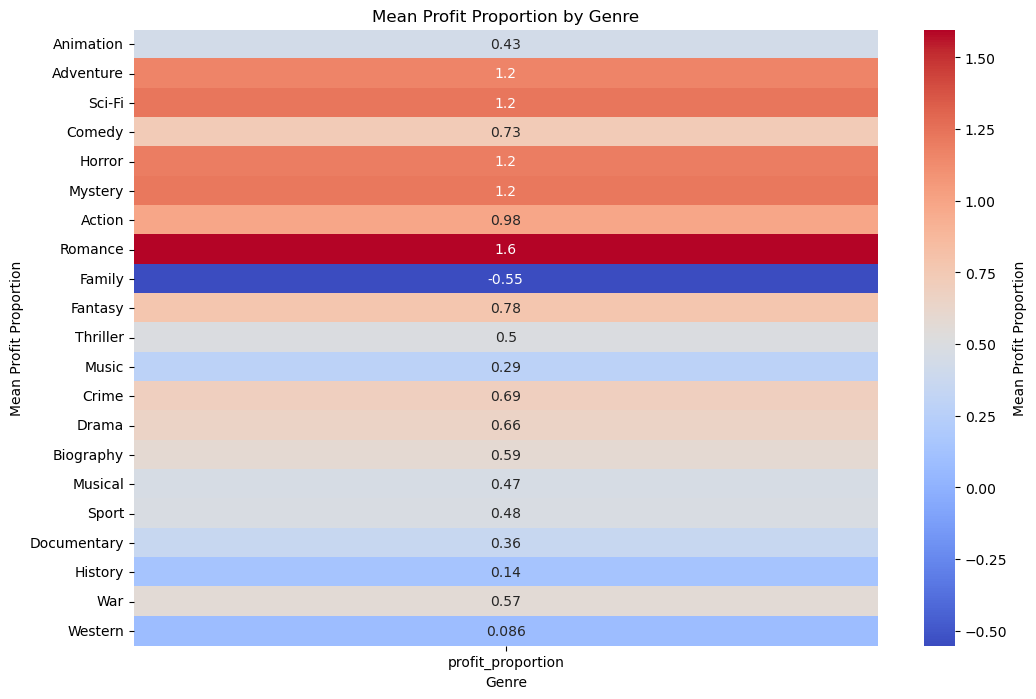

In [ ]:
# Visualizing a heatmap to compare the profit proportion
# Calculate the mean profit proportion for each genre
genre_profit_pivot = iqr_movies_df.groupby('genre')['profit_proportion'].mean().reset_index()

# Pivot table for heatmap
genre_profit_pivot = genre_profit_pivot.pivot_table(index='genre', values='profit_proportion')

# Create a temporary column for title-cased genre names for plotting
genre_profit_pivot.index = genre_profit_pivot.index.str.title()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_profit_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Mean Profit Proportion'})
plt.title('Mean Profit Proportion by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Profit Proportion')
plt.show()

### Total Profits

In [ ]:
movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_type,is_adult,directors,writers,actor1,actor2,actor3,studio,domestic_gross,foreign_gross,tn_production_budget,tn_domestic_gross,tn_worldwide_gross,profit,profit_proportion,roi_perc,isgenre_sci-fi,isgenre_sport,isgenre_action,isgenre_mystery,isgenre_biography,isgenre_history,isgenre_thriller,isgenre_drama,isgenre_crime,isgenre_musical,isgenre_adventure,isgenre_western,isgenre_romance,isgenre_fantasy,isgenre_music,isgenre_documentary,isgenre_comedy,isgenre_animation,isgenre_horror,isgenre_war,isgenre_family,scaled_profit,scaled_tn_production_budget,scaled_tn_worldwide_gross,scaled_domestic_gross,scaled_foreign_gross,log_profit
909,tt0293429,Mortal Kombat,Mortal Kombat,2021,110.00,"Action,Adventure,Fantasy",6.00,191172.00,movie,0,Simon McQuoid,Greg Russo,NaN,NaN,NaN,NaN,NaN,NaN,55000000.00,NaN,83601016.00,28601016.00,0.52,52.00,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,28.60,55.00,83.60,NaN,NaN,17.17
914,tt0315642,Wazir,Wazir,2016,103.00,"Action,Crime,Drama",7.10,19991.00,movie,0,Bejoy Nambiar,Vidhu Vinod Chopra/Abhijat Joshi/Shubhra Swarup/Bejoy Nambiar/Abhijeet Shirish Deshpande/Natasha Sahgal/Gazal Dhaliwal/Shubhra Marfatia,Amitabh Bachchan,Farhan Akhtar,Aditi Rao Hydari,Relbig.,1100000.00,NaN,5200000.00,NaN,5633588.00,433588.00,0.08,8.34,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,0.43,5.20,5.63,1.10,NaN,12.98
930,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,127615.00,movie,0,Scott Frank,Lawrence Block/Scott Frank,Liam Neeson,Dan Stevens,David Harbour,Uni.,26017684.00,36090904.00,28000000.00,26017684.00,62108588.00,34108588.00,1.22,121.82,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,34.11,28.00,62.11,26.02,36.09,17.35
932,tt0369610,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",6.90,682448.00,movie,0,Colin Trevorrow,Michael Crichton/Rick Jaffa/Amanda Silver/Colin Trevorrow/Derek Connolly,Chris Pratt,Bryce Dallas Howard,Ty Simpkins,Uni.,652270656.00,996584256.00,215000000.00,652270656.00,1648854912.00,1433854976.00,6.67,666.91,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1433.85,215.00,1648.85,652.27,996.58,21.08
934,tt0376479,American Pastoral,American Pastoral,2016,108.00,"Crime,Drama,Mystery",6.10,18140.00,movie,0,Ewan McGregor,John Romano/Philip Roth,Ewan McGregor,Jennifer Connelly,Dakota Fanning,LGF,544000.00,NaN,10000000.00,NaN,2063436.00,-7936564.00,-0.79,-79.37,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,-7.94,10.00,2.06,0.54,NaN,NaN


In [ ]:
# Look at the genres with the highest total profits

most_profitable_genres = genre_metrics_df.sort_values(by='TotalProfits', ascending=False)
print("Most Profitable Genres by Total Profits:")
print(most_profitable_genres[['Genre', 'TotalProfits']])

Most Profitable Genres by Total Profits:
          Genre  TotalProfits
10    adventure      85370.52
2        action      82407.44
16       comedy      36209.70
7         drama      31080.94
0        sci-fi      25599.90
17    animation      20584.30
13      fantasy      18942.00
6      thriller      14472.60
8         crime      11293.83
20       family       8282.99
18       horror       6084.94
3       mystery       5010.59
12      romance       4170.02
4     biography       3001.27
5       history       2395.09
14        music       1776.02
1         sport        952.14
9       musical        677.45
15  documentary        525.31
19          war        245.82
11      western        -78.74


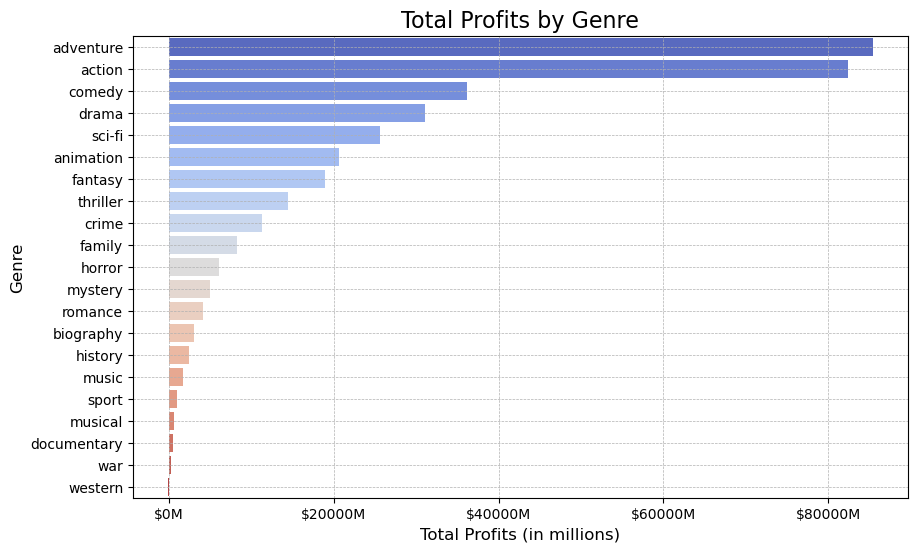

In [ ]:
# Create a color palette that spans from hot to cool
num_genres = len(genre_metrics_df)
hot_to_cool_palette = sns.color_palette("coolwarm", num_genres)
# Plot total profits by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalProfits', y='Genre', data=genre_metrics_df.sort_values(by='TotalProfits', ascending=False), palette=hot_to_cool_palette)
plt.title('Total Profits by Genre', fontsize=16)
plt.xlabel('Total Profits (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
add_dollar_sign_to_ticks('x')
plt.show()

In [ ]:
top_genres = most_profitable_genres

# Compare with less profitable genres or genres with negative profits
less_profitable_genres = genre_metrics_df[genre_metrics_df['TotalProfits'] <= 10000]

top_genres.head(), less_profitable_genres.head()

(        Genre  TotalVotes  WeightedAverageRating  TotalProfits  AverageProfit  AverageProportionalProfit
 10  adventure    84037.25                   7.03      85370.52      139951.67                       1.31
 2      action   103277.89                   6.92      82407.44       95048.95                       1.07
 16     comedy    55491.10                   6.89      36209.70       37995.48                       1.10
 7       drama    86983.15                   7.17      31080.94       20583.40                       0.66
 0      sci-fi    34471.53                   7.06      25599.90      167319.61                       1.23,
       Genre  TotalVotes  WeightedAverageRating  TotalProfits  AverageProfit  AverageProportionalProfit
 18   horror    15298.10                   6.30       6084.94       20557.23                       1.08
 3   mystery    16919.72                   6.75       5010.59       19962.52                       1.08
 12  romance    11336.34                   6.78    

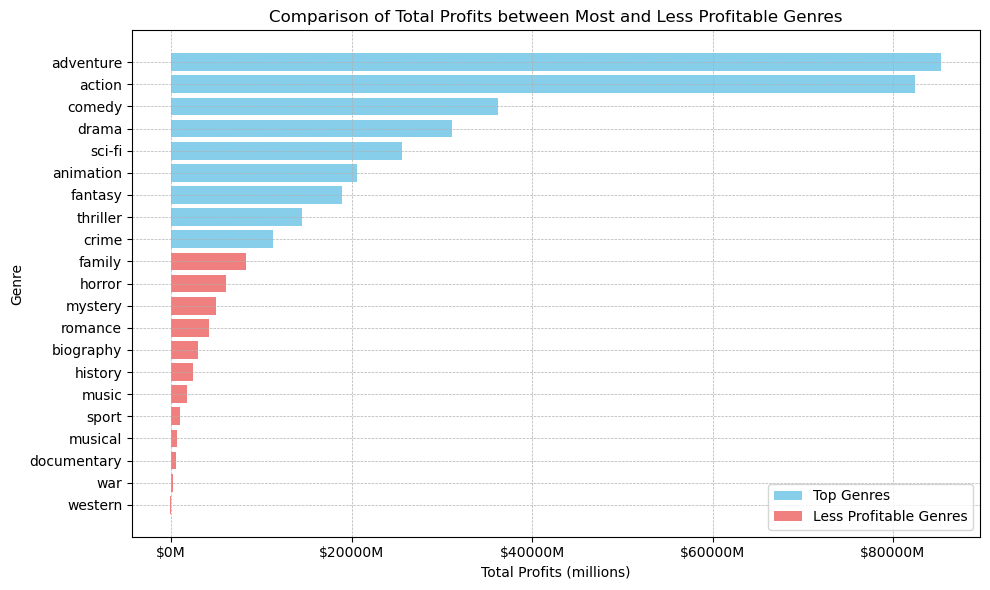

In [ ]:
# Creating variables to compare high profits with lesser profits

top_genres = most_profitable_genres

less_profitable_genres = genre_metrics_df[genre_metrics_df['TotalProfits'] <= 10000]

# Visualization: Compare total profits of top genres vs. less profitable genres
plt.figure(figsize=(10, 6))
plt.barh(top_genres['Genre'], top_genres['TotalProfits'], color='skyblue', label='Top Genres')
plt.barh(less_profitable_genres['Genre'], less_profitable_genres['TotalProfits'], color='lightcoral', label='Less Profitable Genres')
plt.xlabel('Total Profits (millions)')
plt.ylabel('Genre')
plt.title('Comparison of Total Profits between Most and Less Profitable Genres')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to show highest profits at the top
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
add_dollar_sign_to_ticks('x')
plt.show()

### Average Profits

In [ ]:
# Taking a look at the average profits per genre

highest_avg_profit_genres = genre_metrics_df.sort_values(by='AverageProfit', ascending=False)
print("\nGenres with Highest Average Profit per Movie:")
print(highest_avg_profit_genres[['Genre', 'AverageProfit']])


Genres with Highest Average Profit per Movie:
          Genre  AverageProfit
0        sci-fi      167319.61
10    adventure      139951.67
17    animation      102921.48
13      fantasy       96642.86
2        action       95048.95
20       family       59589.83
16       comedy       37995.48
6      thriller       32595.94
8         crime       25436.55
7         drama       20583.40
18       horror       20557.23
9       musical       20528.87
3       mystery       19962.52
1         sport       17632.19
14        music       17584.32
5       history       14515.72
12      romance       13627.51
4     biography       11957.26
15  documentary        5306.15
19          war        5121.33
11      western       -5249.16


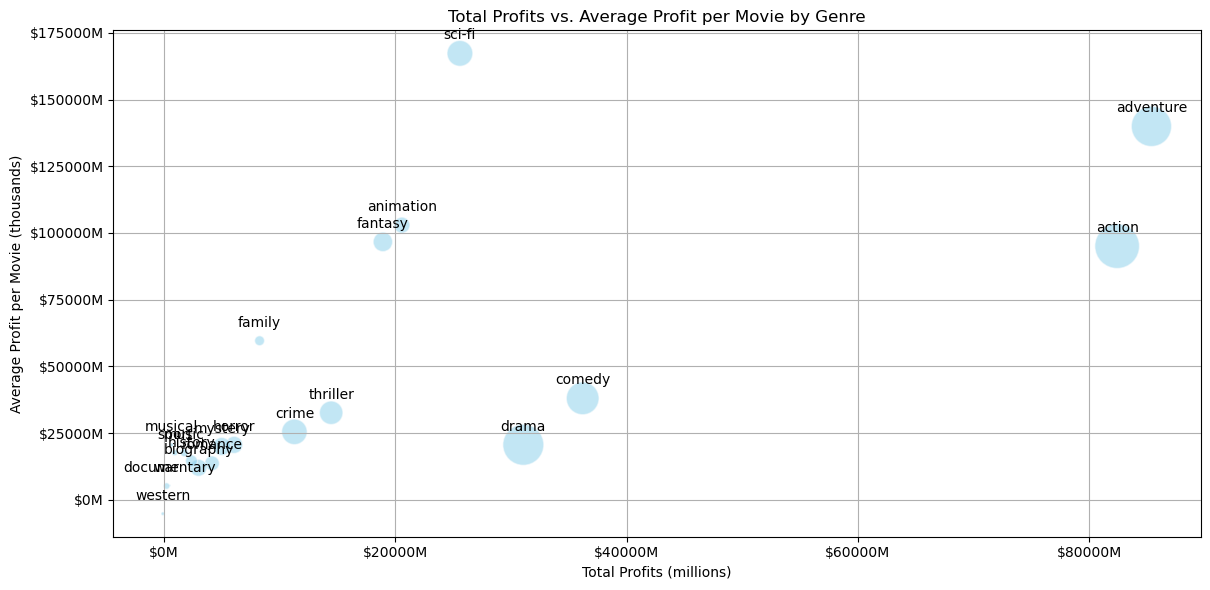

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(genre_metrics_df['TotalProfits'], genre_metrics_df['AverageProfit'], s=genre_metrics_df['TotalVotes']*0.01, c='skyblue', alpha=0.5, edgecolors='w')
plt.xlabel('Total Profits (millions)')
plt.ylabel('Average Profit per Movie (thousands)')
plt.title('Total Profits vs. Average Profit per Movie by Genre')
plt.grid(True)
plt.tight_layout()

add_dollar_sign_to_ticks('x')
add_dollar_sign_to_ticks('y')
# Highlight genres with high average profits
for genre, avg_profit in zip(highest_avg_profit_genres['Genre'], highest_avg_profit_genres['AverageProfit']):
    plt.annotate(genre, (genre_metrics_df.loc[genre_metrics_df['Genre'] == genre, 'TotalProfits'], 
                         genre_metrics_df.loc[genre_metrics_df['Genre'] == genre, 'AverageProfit']),
                    textcoords="offset points", xytext=(0,10), ha='center')
    

## Ratings

In [ ]:
# Looking at the relationship between ratings and profit

high_rating_threshold = 8.0
high_profit_threshold = movies_without_nan_profit['profit'].quantile(0.75)

# Filter movies
highly_rated_profitable_movies = movies_without_nan_profit[(movies_without_nan_profit['averagerating'] >= high_rating_threshold) & (movies_without_nan_profit['profit'] >= high_profit_threshold)]

print(highly_rated_profitable_movies[['primary_title', 'averagerating', 'profit']])

                                                  primary_title  averagerating        profit
991                                                Interstellar           8.70  501379392.00
8419                                           K.G.F: Chapter 2           8.30   77123936.00
10127                                   Spider-Man: No Way Home           8.20 1186428160.00
11881   Demon Slayer: Kimetsu no Yaiba - The Movie: Mugen Train           8.20  437274624.00
17273                                                      Dune           8.00  231142688.00
36332                                        Mad Max: Fury Road           8.10  220098016.00
39499                                                  Deadpool           8.00  743025600.00
47108                                            Dune: Part Two           8.60  521844352.00
47815                                                   Kantara           8.20   58513800.00
48487                                               Oppenheimer       

In [ ]:
# Looking for a correlation between ratings and profit

correlation = movies_without_nan_profit['averagerating'].corr(movies_without_nan_profit['profit'])
print(f"Correlation between average rating and profit: {correlation:.2f}")

Correlation between average rating and profit: 0.18


In [ ]:
# Looking at the relationship between ratings and profit of the top 10 profitable movies

high_rated_movies = top_10_profitable_movies[top_10_profitable_movies['averagerating'] > 7.0].sort_values(by='averagerating', ascending=False)
print(high_rated_movies[['primary_title', 'averagerating', 'profit']])


                                     primary_title  averagerating        profit
125598                           Avengers: Endgame           8.40 2444000000.00
125597                      Avengers: Infinity War           8.40 1748134144.00
56998                            Top Gun: Maverick           8.20 1318732800.00
78843   Star Wars: Episode VII - The Force Awakens           7.80 1823223552.00
53820                     Avatar: The Way of Water           7.50 1860250368.00
91101                                    Furious 7           7.10 1328722816.00


In [ ]:
# looking for the correlation of the top 10 profitable movies

correlation = movies_without_nan_profit['averagerating'].corr(top_10_profitable_movies['profit'])
print(f"Correlation between average rating and profit: {correlation:.2f}")

Correlation between average rating and profit: 0.67


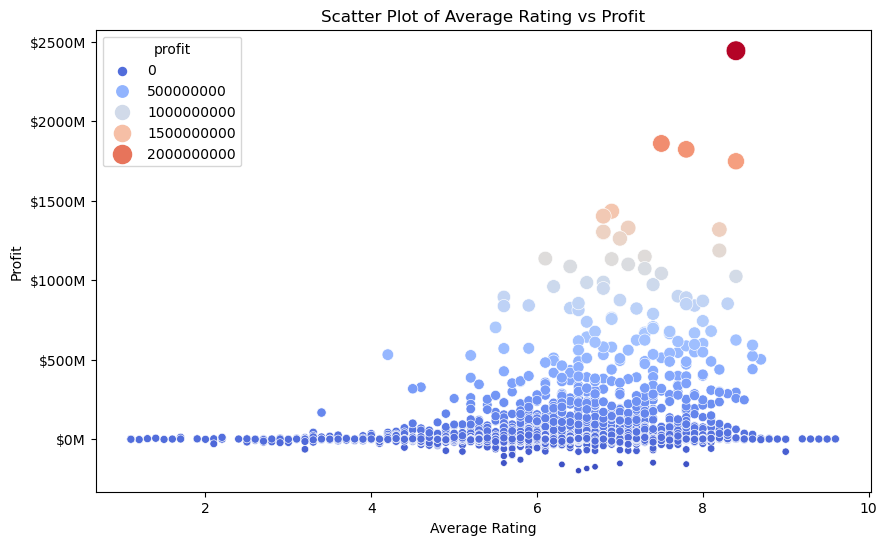

In [ ]:
# Looking for a relationship between profit and ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_without_nan_profit, x='averagerating', y='scaled_profit', hue='profit', palette='coolwarm', size='profit', sizes=(20, 200))
plt.title('Scatter Plot of Average Rating vs Profit')
plt.xlabel('Average Rating')
plt.ylabel('Profit')
add_dollar_sign_to_ticks('y')
plt.show()

## ROI

In [ ]:
# Seeing what the return on investment looks like for each movie

genre_metrics_df

,Genre,TotalVotes,WeightedAverageRating,TotalProfits,AverageProfit,AverageProportionalProfit
17,animation,13388.05,7.31,20584.30,102921.48,1.36
10,adventure,84037.25,7.03,85370.52,139951.67,1.31
0,sci-fi,34471.53,7.06,25599.90,167319.61,1.23
16,comedy,55491.10,6.89,36209.70,37995.48,1.10
18,horror,15298.10,6.30,6084.94,20557.23,1.08
3,mystery,16919.72,6.75,5010.59,19962.52,1.08
2,action,103277.89,6.92,82407.44,95048.95,1.07
12,romance,11336.34,6.78,4170.02,13627.51,1.05
20,family,5093.57,6.61,8282.99,59589.83,0.88
13,fantasy,19677.11,6.62,18942.00,96642.86,0.88


In [ ]:
directors

,movie_id,primary_name
0,tt0063540,Harnam Singh Rawail
1,tt0066787,Mani Kaul
2,tt0069049,Orson Welles
3,tt0069204,Hrishikesh Mukherjee
4,tt0100275,Raoul Ruiz
...,...,...
163290,tt9916622,Ana Célia de Oliveira
163291,tt9916706,Kanchan Nayak
163292,tt9916730,Kiran Gawade
163293,tt9916754,Vinicius Augusto Bozzo


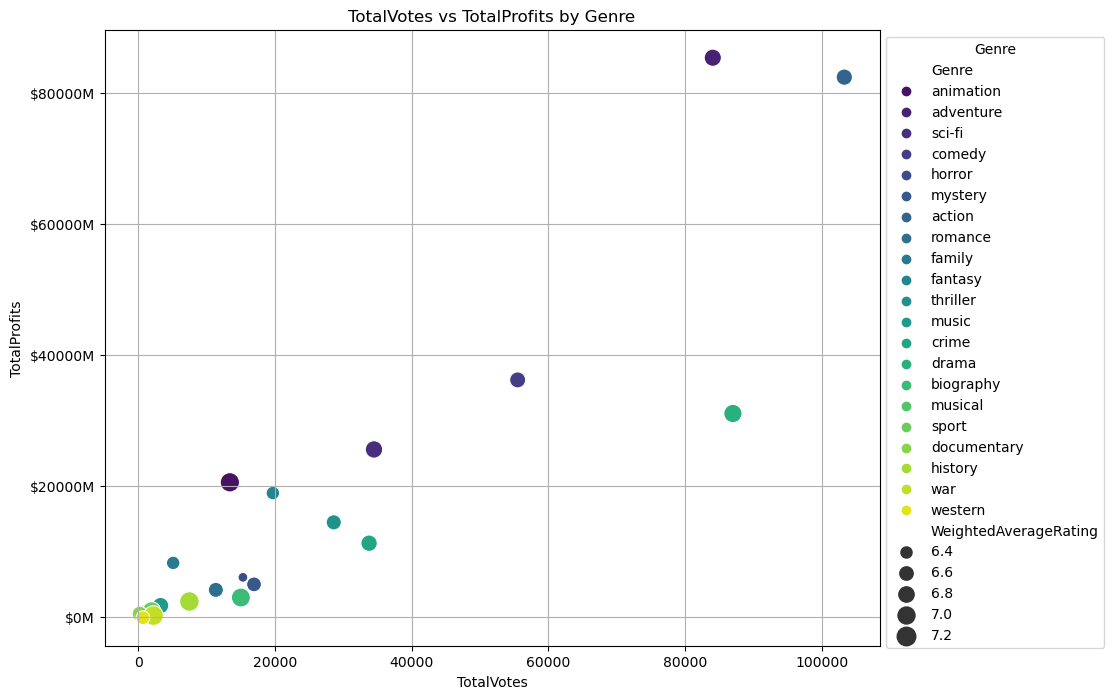

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TotalVotes', y='TotalProfits', hue='Genre', size='WeightedAverageRating', sizes=(50, 200),
                data=genre_metrics_df, palette='viridis', legend='brief')
plt.title('TotalVotes vs TotalProfits by Genre')
plt.xlabel('TotalVotes')
plt.ylabel('TotalProfits')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
add_dollar_sign_to_ticks('y')
plt.show()

In [ ]:
# Created variables to see that stats between high ROI movies vs low ROI movies

high_profit_proportion_movies = top_10_profitable_movies[top_10_profitable_movies['profit_proportion'] > top_10_profitable_movies['profit_proportion'].median()]
low_profit_proportion_movies = top_10_profitable_movies[top_10_profitable_movies['profit_proportion'] <= top_10_profitable_movies['profit_proportion'].median()]

print("High profit_proportion Movies Stats:")
print(high_profit_proportion_movies.describe())

print("\nLow profit_proportion Movies Stats:")
print(low_profit_proportion_movies.describe())

High profit_proportion Movies Stats:
       start_year  runtime_minutes  averagerating  numvotes  is_adult  domestic_gross  foreign_gross  tn_production_budget  tn_domestic_gross  tn_worldwide_gross        profit  profit_proportion  roi_perc  scaled_profit  scaled_tn_production_budget  scaled_tn_worldwide_gross  scaled_domestic_gross  scaled_foreign_gross  log_profit
count        5.00             5.00           5.00      5.00      5.00            1.00           1.00                  5.00               1.00                5.00          5.00               5.00      5.00           5.00                         5.00                       5.00                   1.00                  1.00        5.00
mean      2018.80           124.40           7.34 569258.20      0.00    353007008.00  1165715840.00          180000000.00       353007008.00       1595000192.00 1415000320.00               7.97    797.07        1415.00                       180.00                    1595.00                 353.0

                      directors                               primary_title  profit_proportion
46554             Alethea Jones                                      Barbie               8.97
125598  Anthony Russo/Joe Russo                           Avengers: Endgame               6.87
130715  Chris Buck/Jennifer Lee                                   Frozen II               8.69
932             Colin Trevorrow                              Jurassic World               6.67
78843               J.J. Abrams  Star Wars: Episode VII - The Force Awakens               7.44
53820             James Cameron                    Avatar: The Way of Water               4.04
91101                 James Wan                                   Furious 7               6.99
153635              Jon Favreau                               The Lion King               5.40
56998           Joseph Kosinski                           Top Gun: Maverick               7.76


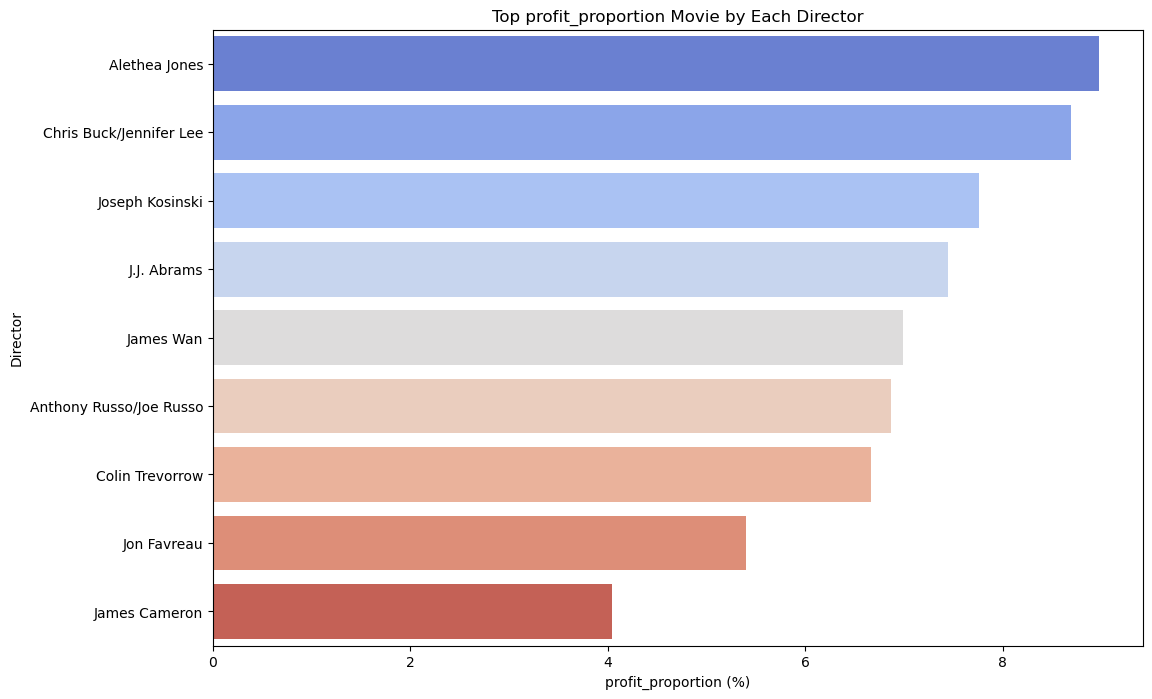

In [ ]:
top_movie_per_director = top_10_profitable_movies.loc[top_10_profitable_movies.groupby('directors')['profit_proportion'].idxmax()]
print(top_movie_per_director[['directors', 'primary_title', 'profit_proportion']])

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='profit_proportion', y='directors', data=top_movie_per_director.sort_values(by='profit_proportion', ascending=False).head(10), palette='coolwarm')
plt.title('Top profit_proportion Movie by Each Director')
plt.xlabel('profit_proportion (%)')
plt.ylabel('Director')
plt.show()

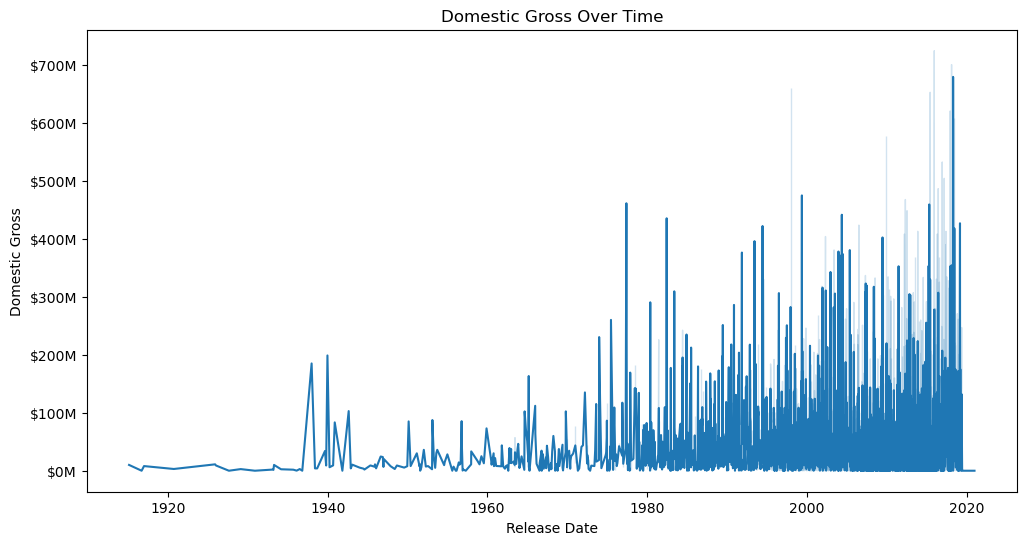

In [ ]:
# Just getting a visual of domestic gross over the years

tn_movie_budgets['scaled_domestic_gross'] = tn_movie_budgets['domestic_gross'] / 1e6

# Function to format tick labels with dollar sign
def dollar_formatter(x, pos):
    return f'${x:.0f}M'

# Generalized function to add dollar sign to tick values
def add_dollar_sign_to_ticks(axis='y'):
    formatter = FuncFormatter(dollar_formatter)
    if axis == 'y':
        plt.gca().yaxis.set_major_formatter(formatter)
    elif axis == 'x':
        plt.gca().xaxis.set_major_formatter(formatter)
    else:
        raise ValueError("Axis must be 'x' or 'y'")

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='scaled_domestic_gross', data=tn_movie_budgets)
plt.title('Domestic Gross Over Time')
plt.xlabel('Release Date')
plt.ylabel('Domestic Gross')
add_dollar_sign_to_ticks()
plt.show()


In [ ]:
# Look at only the data with usable values for the gross/profits

movies_without_nan_profit = movies_df.dropna(subset=['profit'])

# Display the first few rows
movies_without_nan_profit.head()



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_type,is_adult,directors,writers,actor1,actor2,actor3,studio,domestic_gross,foreign_gross,tn_production_budget,tn_domestic_gross,tn_worldwide_gross,profit,profit_proportion,roi_perc,isgenre_sci-fi,isgenre_sport,isgenre_action,isgenre_mystery,isgenre_biography,isgenre_history,isgenre_thriller,isgenre_drama,isgenre_crime,isgenre_musical,isgenre_adventure,isgenre_western,isgenre_romance,isgenre_fantasy,isgenre_music,isgenre_documentary,isgenre_comedy,isgenre_animation,isgenre_horror,isgenre_war,isgenre_family,scaled_profit,scaled_tn_production_budget,scaled_tn_worldwide_gross,scaled_domestic_gross,scaled_foreign_gross,log_profit
909,tt0293429,Mortal Kombat,Mortal Kombat,2021,110.00,"Action,Adventure,Fantasy",6.00,191172.00,movie,0,Simon McQuoid,Greg Russo,NaN,NaN,NaN,NaN,NaN,NaN,55000000.00,NaN,83601016.00,28601016.00,0.52,52.00,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,28.60,55.00,83.60,NaN,NaN,17.17
914,tt0315642,Wazir,Wazir,2016,103.00,"Action,Crime,Drama",7.10,19991.00,movie,0,Bejoy Nambiar,Vidhu Vinod Chopra/Abhijat Joshi/Shubhra Swarup/Bejoy Nambiar/Abhijeet Shirish Deshpande/Natasha Sahgal/Gazal Dhaliwal/Shubhra Marfatia,Amitabh Bachchan,Farhan Akhtar,Aditi Rao Hydari,Relbig.,1100000.00,NaN,5200000.00,NaN,5633588.00,433588.00,0.08,8.34,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,0.43,5.20,5.63,1.10,NaN,12.98
930,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",6.50,127615.00,movie,0,Scott Frank,Lawrence Block/Scott Frank,Liam Neeson,Dan Stevens,David Harbour,Uni.,26017684.00,36090904.00,28000000.00,26017684.00,62108588.00,34108588.00,1.22,121.82,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,34.11,28.00,62.11,26.02,36.09,17.35
932,tt0369610,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",6.90,682448.00,movie,0,Colin Trevorrow,Michael Crichton/Rick Jaffa/Amanda Silver/Colin Trevorrow/Derek Connolly,Chris Pratt,Bryce Dallas Howard,Ty Simpkins,Uni.,652270656.00,996584256.00,215000000.00,652270656.00,1648854912.00,1433854976.00,6.67,666.91,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1433.85,215.00,1648.85,652.27,996.58,21.08
934,tt0376479,American Pastoral,American Pastoral,2016,108.00,"Crime,Drama,Mystery",6.10,18140.00,movie,0,Ewan McGregor,John Romano/Philip Roth,Ewan McGregor,Jennifer Connelly,Dakota Fanning,LGF,544000.00,NaN,10000000.00,NaN,2063436.00,-7936564.00,-0.79,-79.37,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,-7.94,10.00,2.06,0.54,NaN,NaN


## Genre

In [ ]:
# Looking at the top 10 movies with the highest profit

top_profitable_movies = movies_without_nan_profit.sort_values(by='profit', ascending=False)

# Display the top 10 most profitable movies
print(top_profitable_movies[['primary_title', 'tn_worldwide_gross', 'tn_production_budget', 'profit']].head(10))

                                     primary_title  tn_worldwide_gross  tn_production_budget        profit
125598                           Avengers: Endgame       2800000000.00          356000000.00 2444000000.00
53820                     Avatar: The Way of Water       2320250368.00          460000000.00 1860250368.00
78843   Star Wars: Episode VII - The Force Awakens       2068223616.00          245000000.00 1823223552.00
125597                      Avengers: Infinity War       2048134144.00          300000000.00 1748134144.00
932                                 Jurassic World       1648854912.00          215000000.00 1433854976.00
153635                               The Lion King       1663000064.00          260000000.00 1403000064.00
91101                                    Furious 7       1518722816.00          190000000.00 1328722816.00
56998                            Top Gun: Maverick       1488732800.00          170000000.00 1318732800.00
130715                               

/tmp/ipykernel_501844/1612940052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_profitable_movies['scaled_profit'] = top_profitable_movies['profit'] / 1e6


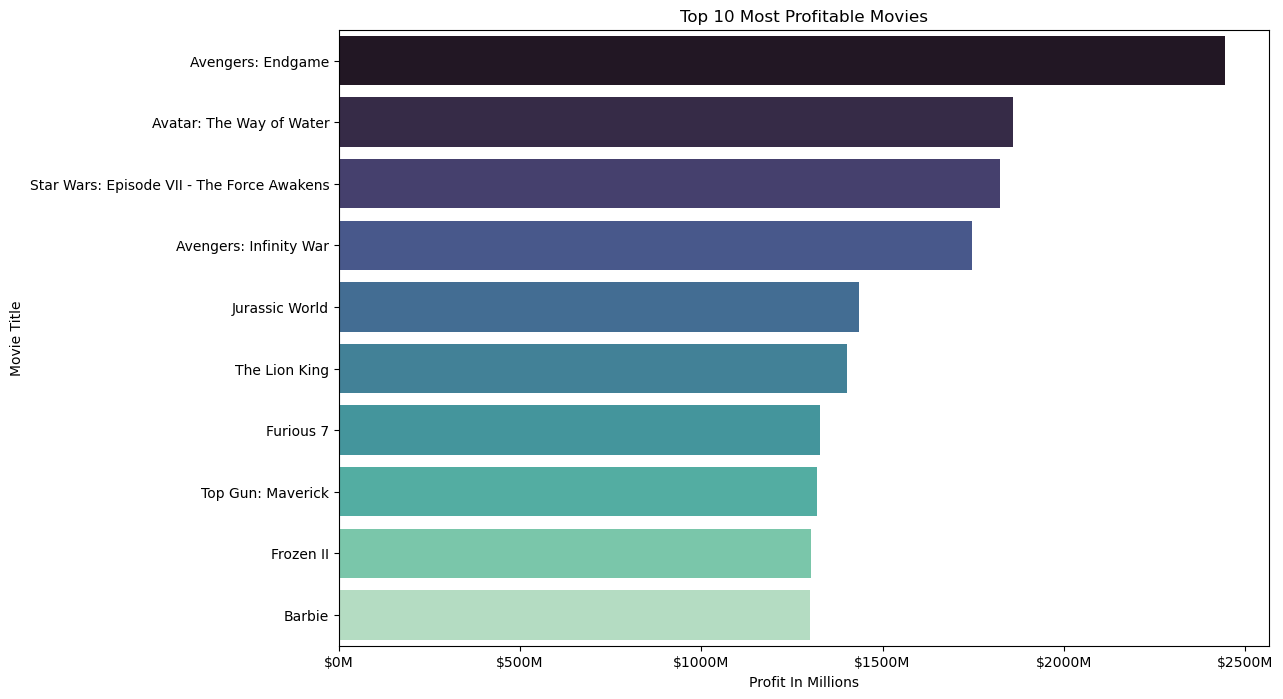

In [ ]:
# Putting those movies into something visual

top_10_profitable_movies = top_profitable_movies.head(10)
top_10_profitable_movies['scaled_profit'] = top_profitable_movies['profit'] / 1e6

plt.figure(figsize=(12, 8))
sns.barplot(x='scaled_profit', y='primary_title', data=top_10_profitable_movies, palette='mako')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit In Millions')
plt.ylabel('Movie Title')
add_dollar_sign_to_ticks('x')
plt.show()

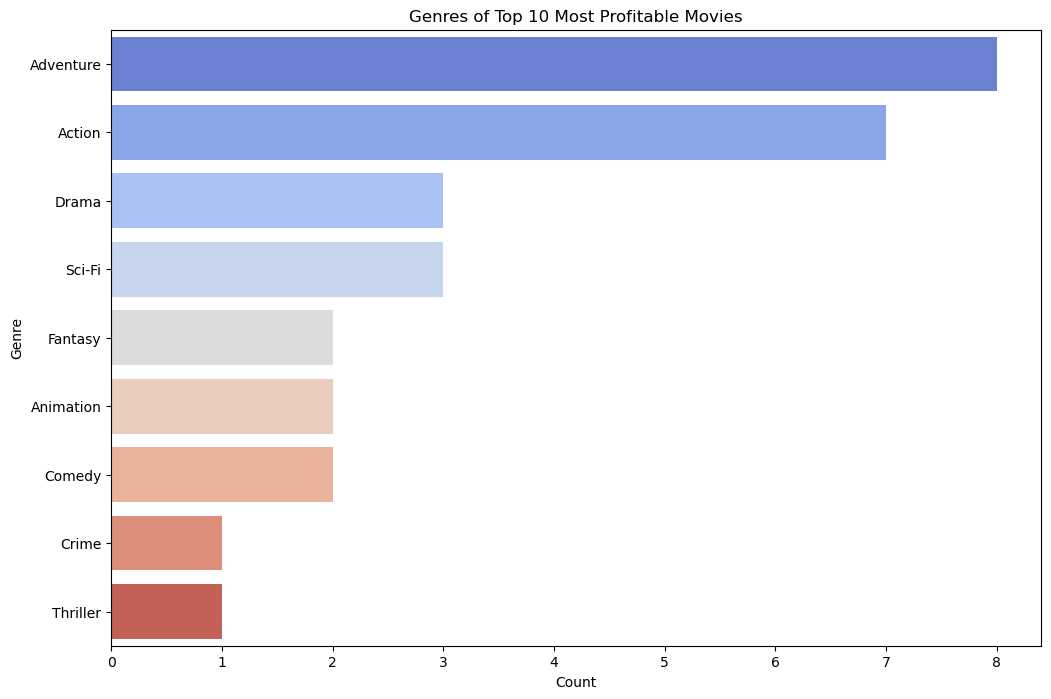

In [ ]:
# Of those 10 movies, we look at how many genres there are among them

genres = top_10_profitable_movies['genres'].str.split(',').explode()
genre_counts = genres.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Genres of Top 10 Most Profitable Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Making a new dataframe to use the previously coded genres
melted_df = movies_without_nan_profit.melt(id_vars=['movie_id', 'profit'], var_name='genre', value_name='is_genre')
melted_df = melted_df[melted_df['is_genre'] == True]

# looking at the highest average profit per genre
average_profit_per_genre = melted_df.groupby('genre')['profit'].mean().sort_values(ascending=False)
average_profit_per_genre

genre
isgenre_sci-fi                176650928.00
isgenre_adventure             155436704.00
isgenre_animation             133748504.00
isgenre_fantasy               109356536.00
isgenre_action                101901152.00
isgenre_family                 63492164.00
isgenre_comedy                 49986016.00
isgenre_thriller               42991908.00
isgenre_music                  38258036.00
isgenre_horror                 36632692.00
scaled_foreign_gross           34404200.00
isgenre_mystery                34157540.00
isgenre_crime                  30117600.00
isgenre_drama                  28651420.00
isgenre_biography              25697160.00
isgenre_history                21126400.00
isgenre_romance                21008220.00
isgenre_musical                20528872.00
isgenre_sport                  17006976.00
isgenre_documentary             9434976.00
scaled_tn_production_budget     8818210.00
isgenre_war                     5235358.00
scaled_profit                   1000000.00
profi

In [ ]:
# cleaning up the genre names from the hot encoding

melted_df['genre'] = melted_df['genre'].str.replace('isgenre_', '').str.replace('-', ' ').str.title()

# Display the first few rows to verify changes
print(melted_df[['genre', 'profit']].head())

                   genre     profit
63636  Profit_Proportion  450000.00
63646  Profit_Proportion   25000.00
63669  Profit_Proportion    5000.00
63815  Profit_Proportion    2500.00
63971  Profit_Proportion 1100000.00


In [ ]:
# Getting a grasp of the profit numbers for the genres

genre_profit_mean = melted_df.groupby('genre')['profit'].mean().sort_values(ascending=False)
genre_total_profit = melted_df.groupby('genre')['profit'].sum().sort_values(ascending=False)
genre_median_profit = melted_df.groupby('genre')['profit'].median().sort_values(ascending=False)


genre_profit_summary = pd.DataFrame({
    'mean_profit': genre_profit_mean,
    'total_profit': genre_total_profit,
    'median_profit': genre_median_profit
})

genre_profit_summary.sort_values(by='mean_profit', ascending=False, inplace=True)


print(genre_profit_summary.head(10))

           mean_profit   total_profit  median_profit
genre                                               
Sci Fi    176650928.00 29324054528.00    20604126.00
Adventure 155436704.00 98702303232.00    25900000.00
Animation 133748504.00 29157173248.00    17719194.00
Fantasy   109356536.00 22418089984.00     4733446.00
Action    101901152.00 93545259008.00     6437012.00
Family     63492164.00  9396840448.00     1288983.00
Comedy     49986016.00 52535304192.00     2406761.00
Thriller   42991908.00 21796896768.00     1495262.00
Music      38258036.00  4208384000.00      483545.00
Horror     36632692.00 13370932224.00     3484368.00


### Proportional profit

In [ ]:
movies_df['profit_proportion'] = np.where(
    (movies_df['tn_production_budget'] != 0) & (~movies_df['tn_production_budget'].isna()),
    movies_df['profit'] / movies_df['tn_production_budget'],
    np.nan
)
display(movies_df['profit_proportion'].info())
display(movies_df['profit_proportion'].value_counts())

<class 'pandas.core.series.Series'>
Int64Index: 3167 entries, 909 to 194887
Series name: profit_proportion
Non-Null Count  Dtype  
--------------  -----  
3167 non-null   float32
dtypes: float32(1)
memory usage: 37.1 KB


None

1.00     18
9.00     15
2.33     13
2.00      9
-0.80     7
         ..
-1.00     1
-0.85     1
-0.87     1
1.06      1
-0.98     1
Name: profit_proportion, Length: 2999, dtype: int64

# Close the im.db connection
It's always good practice to ensure you closed the connection

In [ ]:

# Close the connection
conn.close()